# Chapter 15: Machine Learning: Classification, Regression and Clustering

15. 1 ***(Data Visualization Using PCA)*** In this chapter, we visualized the Digits dataset’s
clusters using the TSNE estimator to reduce the dataset’s features and Seaborn to plot the
results. Reimplement this example by using the scikit-learn PCA estimator to perform
dimensionality reduction and graph the results. Compare both clustering diagrams based
on number of clusters, scale of the axis, etc.

In [2]:
#Exercise 15.1: Data Visualization using PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

digits = load_digits()

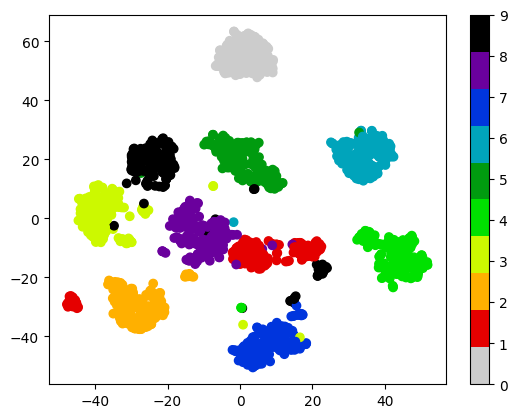

In [5]:
#Exercise 15.1: Data Visualization using PCA

# With TSNE 
tsne = TSNE(n_components=2, random_state=11)

# Transforming the Digits Dataset's Features into Two Dimensions
reduced_data = tsne.fit_transform(digits.data)

# Visualizing the Reduced Data with Different Colors for Each Digit
dots = plt.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1],
     c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

colorbar = plt.colorbar(dots)

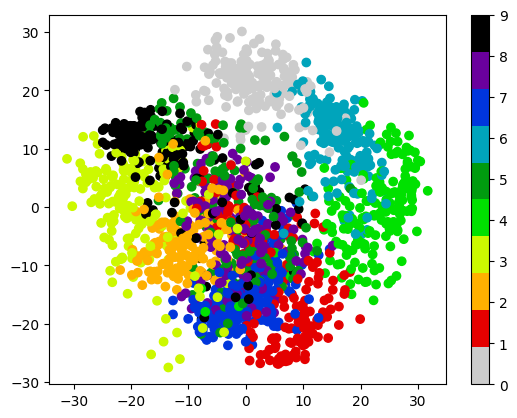

In [6]:
#Exercise 15.1: Data Visualization using PCA

# With PCA
pca = PCA(n_components=2, random_state=11)

# Transforming the Digits Dataset's Features into Two Dimensions
pca.fit(digits.data)

digits_pca = pca.transform(digits.data)

# Visualizing the Reduced Data with Different Colors for Each Digit
dots = plt.scatter(x=digits_pca[:, 0], y=digits_pca[:, 1],
     c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

plt.colorbar(dots)

15. 2 ***(Data Visualization Using TSNE)*** In this chapter, we visualized the Iris dataset's clusters using the scikit-learn PCA estimator to reduce the number of features and plotted the results using Seaborn. Reimplement this example using scikit-learn's TSNE estimator. First graph the results using Seaborn and then graph the results using Matplotlib.

In [11]:
#Exercise 15.2: Data Visualization Using TSNE
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Creating the TSNE Object
tsne = TSNE(n_components=2, random_state=11)

# Transforming the Iris Dataset’s Features into Two Dimensions
iris_tsne = tsne.fit_transform(iris.data)


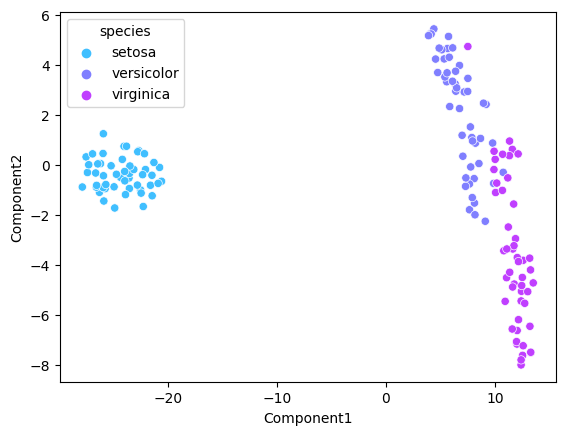

In [12]:
#Exercise 15.2: Data Visualization Using TSNE

# Visualizing the Reduced Data with seaborn
iris_tsne_df = pd.DataFrame(iris_tsne, 
                            columns=['Component1', 'Component2'])

iris_tsne_df['species'] = iris_df.species

axes = sns.scatterplot(data=iris_tsne_df, x='Component1', 
     y='Component2', hue='species', legend='brief', 
     palette='cool')


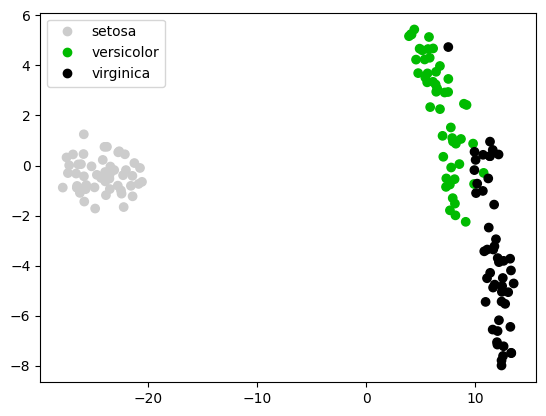

In [13]:
#Exercise 15.2: Data Visualization Using TSNE

# Visualizing the Reduced Data with matplotlib
iris_plt = plt.scatter(iris_tsne[:,0], iris_tsne[:,1], 
                  c=iris.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 3))

handles, _ = iris_plt.legend_elements(prop='colors', num=3)
plt.legend(handles, iris.target_names, loc = 'best')

15. 3 ***(Comparing PCA and TSNE)*** Cluster the Wine recognition dataset by first using the scikit-learn's PCA estimator to reduce the number of features and then by using the scikit-learn's TSNE estimator. Plot both results using either Seaborn or Matplotlib. Compare both results.

In [1]:
# Exercise 15.3: Comparing PCA and TSNE

# tools #
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# dimensionality reduction algorithms #
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# dataset #
from sklearn.datasets import load_wine


# Initialization phase #
wine = load_wine()
print(wine.DESCR)
print()

wine_df = pd.DataFrame(
    data=wine.data,
    columns=wine.feature_names
    );

wine_df['class'] = [wine.target_names[i] for i in wine.target]

pd.set_option('display.width', None)

display(wine_df.head())


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline    class  
0                          3.92   1065.0  class_0  
1                          3.40   1050.0  class_0  
2                          3.17   1185.0  class_0  
3                          3.45   1480.0  class_0  
4                          2.93    735.0  class_0

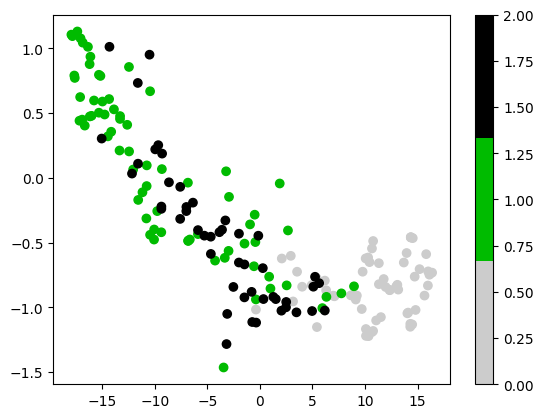

In [2]:
# Exercise 15.3: Comparing PCA and TSNE

# With TSNE #

tsne = TSNE(n_components=2, random_state=11)

wine_tsne = tsne.fit_transform(wine.data)

figure = plt.scatter(
    x= wine_tsne[:, 0],  
    y= wine_tsne[:, 1],
    c= wine.target,
    cmap= plt.cm.get_cmap('nipy_spectral_r', 3)
    );

colorbar = plt.colorbar(figure)


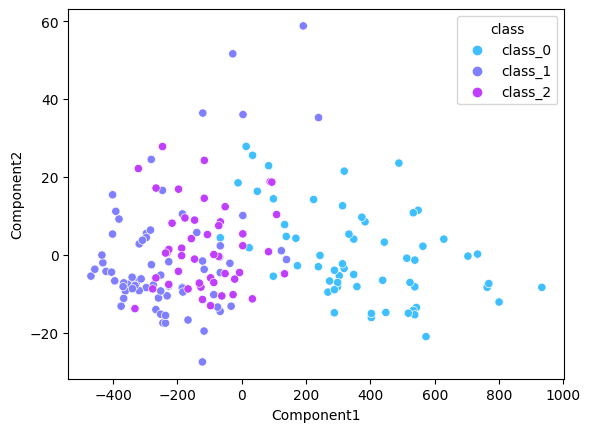

In [3]:
# Exercise 15.3: Comparing PCA and TSNE

# With PCA
pca = PCA(n_components=2, random_state=11)

wine_pca = pca.fit_transform(wine.data)

wine_pca_df = pd.DataFrame(data=wine_pca, columns=['Component1', 'Component2'])
wine_pca_df['class'] = wine_df['class']

figure = sns.scatterplot(
    data= wine_pca_df, 
    x='Component1', 
    y= 'Component2',
    hue='class', 
    legend='brief', 
    palette='cool'
    );

15. 4 (***Human Recognition of Handwritten Digits)*** In this chapter, we analyzed the Digits dataset and used scikit-learn's kNeighborsClassifier to recognize the digits with high accuracy. Can humans recognize digit images as well as the kNeighborsClassifier did? Create a script that randomly selects and displays individual images and asks the user to enter a digit from 0 through 9 specifying the digit the image represents. Keep track of the user's accuracy. How does the user compare to the k-nearest neighbors machine-learning algorithm?

In [ ]:
#Exercise 15.4: Human Recognition of Handwritten Digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits 

import matplotlib.pyplot as plt

from numpy import array, random


def show_image(imag:array, targ: int = False) -> None:
    '''The function displays a grayscale image and sets the title if a target is provided.
    
    Parameters
    ----------
    imag : np.array
        a numpy array representing an image
    targ : int, optional
        If a value is provided for targ, it will be displayed as the title of the image plot.
    
    '''

    axes = plt.subplot()
    image = plt.imshow(imag, cmap=plt.cm.gray_r)
    xtics = axes.set_xticks([])
    ytics = axes.set_yticks([])
    axes.set_title(targ) if not isinstance(targ, bool) else None


def recognition():
    '''This function allows the user to recognize digits from 0 to 9 
    
    Returns
    -------
        a np.array of scores, where each score is a boolean value indicating whether the user correctly
    identified the digit in the image or not.
    '''

    scores = list()

    while True:
        
        target = random.choice(digits.target)
        digit = digits.images[target]
        show_image(digit)
        plt.show()
            
        answer = input('Enter a digit from 0 to 9 specifying the digit that represents the image(-1 to exit): ')
        print()
        if answer.lstrip('-').isdigit() and -1 <= (answer := int(answer)) < 10:
            
            if answer == -1:
                break
            
            scores.append(True) if answer == target else scores.append(False)
            
        else:
            print("Value Error:The answer must be a digit between 0 and 9 or -1 to exit.")
    
    return array(scores)
   
        

digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11)

knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)


user_score = recognition()

print('Hits:', user_score.sum())
print('misses:', abs(len(user_score) - user_score.sum() ))
print(f'accuracy: { user_score.mean():.3%}')
print()
print(f'KNeighbors Classifier accuracy: {knn.score(X_test, y_test): .3%}')

15 .5 ***(Using TSNE to Visualize the Digits Dataset in 3D)*** In Section 15.6, you visualized
the Digits dataset's clusters in two dimensions. In this exercise, you'll create a 3D scatter
plot using TSNE and Matplotlib's Axes3D, which provides x-, y- and z-axes for plotting in
three dimensions. To do so, load the Digits dataset, create a TSNE estimator that reduces
data to three dimensions and call the estimator's fit_transform method to reduce the
dataset's dimensions. Store the result in reduced_data. Next, execute the following code
```python

from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure(figsize=(9, 9))

axes = figure.add_subplot(111, projection='3d')

dots = axes.scatter(xs=reduced_data[:, 0], ys=reduced_data[:, 1],
                    zs=reduced_data[:, 2], c=digits.target,
                    cmap=plt.cm.get_cmap('nipy_spectral_r', 10)
                    )
```

The preceding code imports Axes3D, creates a Figure and calls its add_subplot method
to get an Axes3D object for creating a three-dimensional graph. In the call to the Axes3D
scatter method, the keyword arguments xs, ys and zs specify one-dimensional arrays of
values to plot along the x-, y- and z-axes. Once the graph is displayed, be sure to drag the
mouse on the image to rotate it left, right, up and down so you can see the clusters from
various angles.

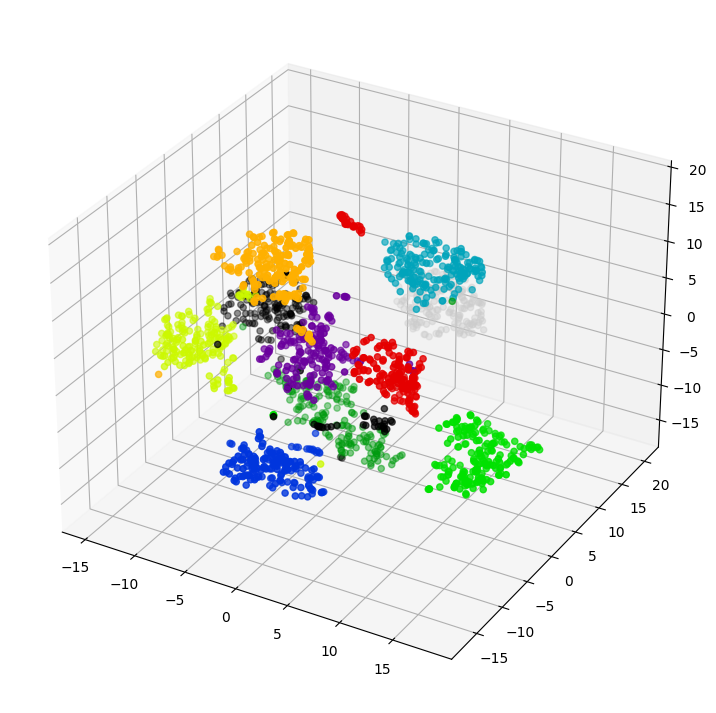

In [5]:
#Exercise 15.5: Using TSNE to Visualize the Digits Dataset in 3D
from sklearn.datasets import load_digits

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()

tsne = TSNE(n_components=3, random_state=11)

reduced_data = tsne.fit_transform(digits.data)


figure =  plt.figure(figsize=(9, 9))

axes = figure.add_subplot(111, projection='3d')

dots = axes.scatter(xs=reduced_data[:, 0], ys=reduced_data[:, 1],
                    zs=reduced_data[:, 2], c=digits.target,
                    cmap=plt.cm.get_cmap('nipy_spectral_r', 10)
                    )

plt.show()


15. 6 ***(Simple Linear Regression with Metro Interstate Traffic Volume Dataset)*** Go to https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume and download the available time series data for the Minneapolis interstate hourly metro traffic volumes. For your convenience, we provided the data in the file *Metro_Interstate_Traffic_Volume.csv*. Reimplement the simple linear regression case study of Section 15.4 using the first 150 samples of the traffic volume data.

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
9178     None  287.15      0.0      0.0          90          Rain   
29430    None  274.55      0.0      0.0          90          Mist   
32277    None  282.29      0.0      0.0           1         Clear   
11742    None  260.91      0.0      0.0          64        Clouds   
37263    None  286.15      0.0      0.0          90          Mist   
32875    None  279.09      0.0      0.0          90  Thunderstorm   
20420    None  267.86      0.0      0.0          40        Clouds   
32639    None  283.41      0.0      0.0          90          Haze   
12473    None  256.77      0.0      0.0           1         Clear   
8706     None  301.64      0.0      0.0           0         Clear   

          weather_description            date_time  traffic_volume  
9178               light rain  2013-09-28 14:00:00            4642  
29430                    mist  2016-12-24 15:00:00            3713  
32277            sky is clear  2017-04-01 22:00:00            3198  
11742           broken clouds  2014-01-25 04:00:00             392  
37263                    mist  2017-09-18 14:00:00            4778  
32875  proximity thunderstorm  2017-04-20 03:00:00             327  
20420        scattered clouds  2016-01-05 07:00:00            6525  
32639                    haze  2017-04-13 14:00:00            5400  
12473            sky is clear  2014-02-24 02:00:00             231  
8706             Sky is Clear  2013-08-29 17:00:00            6724

predicted: 280.48, expected: 294.28
predicted: 282.96, expected: 287.29
predicted: 280.20, expected: 270.63
predicted: 281.45, expected: 256.14
predicted: 282.49, expected: 287.48


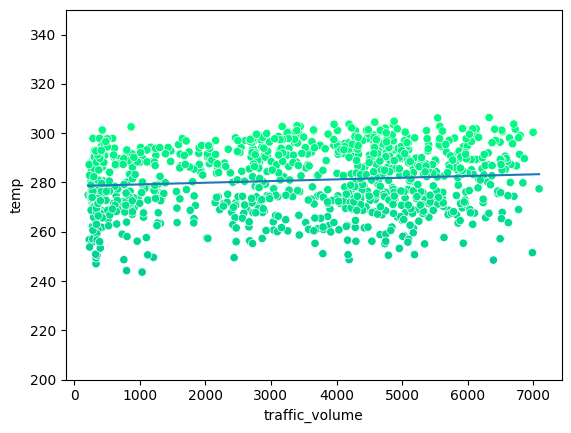

In [7]:
#Exercise 15.6: Simple Linear Regression with Metro Interstate Traffic Volume Dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mitv = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
mitv = mitv.sample(frac=0.02, random_state=9)

display(mitv.head(10))

X_train, X_test, y_train, y_test = train_test_split( 
                                                    mitv.traffic_volume.values.reshape(-1,1),
                                                    mitv.temp.values,
                                                    random_state=11
                                                    )

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y= y_train)

predicted = linear_regression.predict(X_test)
expected = y_test


for p, e in zip(predicted[:5], expected[:5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')




predict = lambda x: linear_regression.coef_ * x + linear_regression.intercept_

x = np.array([min(mitv.traffic_volume.values), max(mitv.traffic_volume.values)])
y = predict(x)

axes = sns.scatterplot(data= mitv, x='traffic_volume', y='temp', 
                       hue='temp', palette='winter', legend=False)

axes.set_ylim(200, 350)

line = plt.plot(x, y)

15. 7 ***(Classification with the Iris Dataset)*** As the Iris dataset is labelled, we can use the scikit-learn's supervised machine learning estimators. Use the techniques you learned in the Digits dataset classification case study to perform classification on it with the k-nearest neighbors algorithm. What is the prediction accuracy? Has there been overfitting in the data model? Research overfitting and how to prevent it.



In [1]:
#Exercise 15.7: Classification with the Iris Dataset
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


import pandas as pd


iris = load_iris()
iris_df = pd.DataFrame(data= iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]
display(iris_df.head())


X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=11)
knn = KNeighborsClassifier()

knn.fit(X=X_train, y=y_train)


predicted = knn.predict(X_test)


confusion = confusion_matrix(y_true=y_test, y_pred=predicted)
confusion = pd.DataFrame(data=confusion, 
                         columns=iris.target_names, 
                         index=range(len(iris.target_names))
                         )
print(f'Prediction accuracy: {knn.score(X_test, y_test):.3%}')

print(f'\nConfusion Matrix:')
display(confusion)


print('\nClassification Report:')
print(classification_report(y_test, predicted,  target_names=iris.target_names))


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa


Confusion Matrix:


setosa  versicolor  virginica
0      12           0          0
1       0          11          0
2       0           1         14


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.93      0.97        15

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Prediction accuracy: 97.368%


15. 8 ***(Classification with the Iris Dataset: Hyperparameter Tuning)*** Calculate the accuracy of different k values when classifying the Iris samples using a KNeighborsClassifier. Choose the optimal k value. Why does the performance deteriorate with a higher k value?

##### *Answer:* 
*The accuracy tends to decrease for higher k values in the k-nearest neighbors (KNN) algorithm because a higher k value means that the model is considering more neighbors to make a prediction. This can lead to oversmoothing of the data and a loss of discriminatory power, which can result in lower accuracy.*

In [1]:
#Exercise 15.8: Classification with the Iris Dataset: Hyperparameter Tuning
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score


iris = load_iris()

for k in range(1,20, 2):

    knn = KNeighborsClassifier(n_neighbors=k)
    kfold = KFold(
        n_splits=10, 
        random_state=12,
        shuffle=True
        )
    scores = cross_val_score(
        estimator=knn,
        X=iris.data, 
        y=iris.target,
        cv=kfold
        )

    print(f'k = {k:>2}; '
          + f'Mean Accuracy = {scores.mean():.3%}; '
          + f'Accuracy Standard Deviation = {scores.std():.3%}')

k =  1; Mean Accuracy = 96.000%; Accuracy Standard Deviation = 4.422%
k =  3; Mean Accuracy = 96.667%; Accuracy Standard Deviation = 4.472%
k =  5; Mean Accuracy = 97.333%; Accuracy Standard Deviation = 4.422%
k =  7; Mean Accuracy = 97.333%; Accuracy Standard Deviation = 5.333%
k =  9; Mean Accuracy = 97.333%; Accuracy Standard Deviation = 6.110%
k = 11; Mean Accuracy = 98.000%; Accuracy Standard Deviation = 4.269%
k = 13; Mean Accuracy = 98.667%; Accuracy Standard Deviation = 4.000%
k = 15; Mean Accuracy = 98.000%; Accuracy Standard Deviation = 4.269%
k = 17; Mean Accuracy = 98.000%; Accuracy Standard Deviation = 4.269%
k = 19; Mean Accuracy = 97.333%; Accuracy Standard Deviation = 5.333%


15.  9 ***(Classification with the Iris Dataset: Choosing the Best Estimator)*** Run multiple classification estimators for the Iris dataset as done in the digits case study. Compare the results. 

In [2]:
#Exercise 15.9: Classification with the Iris Dataset: Choosing the Best Estimator
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score


iris = load_iris()
estimators = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'LinearSVC': LinearSVC(dual=False),
    'GaussianNB': GaussianNB()  
};

for estimator_name, estimator_object in estimators.items():

    kfold = KFold(
        n_splits=10, 
        random_state=12,
        shuffle=True
        )
    scores = cross_val_score(
        estimator=estimator_object,
        X=iris.data, 
        y=iris.target,
        cv=kfold
        )

    print(f'{estimator_name:>20}: '
          + f'Mean Accuracy = {scores.mean():.3%}; '
          + f'Accuracy Standard Deviation = {scores.std():.3%}')
    


KNeighborsClassifier: Mean Accuracy = 97.333%; Accuracy Standard Deviation = 4.422%
                 SVC: Mean Accuracy = 97.333%; Accuracy Standard Deviation = 6.110%
           LinearSVC: Mean Accuracy = 94.667%; Accuracy Standard Deviation = 4.000%
          GaussianNB: Mean Accuracy = 95.333%; Accuracy Standard Deviation = 4.269%


15. 10 ***(Clustering the Digits Dataset with *DBSCAN* and *MeanShift*)*** Recall that when using the *DBSCAN* and *MeanShift* clustering estimators you do not specify the number of clusters in advance. Use each of these estimators with the Digits dataset to determine whether each estimator recognizes 10 clusters of digits.

In [4]:
#Exercise 15.10: Clustering the Digits Dataset with DBSCAN and MeanShift
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from numpy import unique


digits = load_digits()
estimators = {
    'KMeans': KMeans(n_clusters=10, random_state=11, n_init='auto'),
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
};

for name, estimator in estimators.items():
    
    estimator.fit(digits.data)
     
    print(f'\n{name}:')
    labels, counts = unique(
        estimator.labels_, return_counts=True)

    for label, count in zip(labels, counts):
        print(f'   label={label}, count={count}')
             


KMeans:
   label=0, count=227
   label=1, count=237
   label=2, count=182
   label=3, count=204
   label=4, count=179
   label=5, count=176
   label=6, count=93
   label=7, count=185
   label=8, count=149
   label=9, count=165

DBSCAN:
   label=-1, count=1797

MeanShift:
   label=0, count=1797


15. 11 ***(Using %timeit to Time Training and Prediction)*** In the k-nearest neighbors algorithm, the computation time for classification increases with the value of k. Calculate the mean accuracy and the run time for k between 1 and 21 for the Digits dataset. Use %timeit to measure the run time.

In [2]:
#Exercise 15.11: Using %timeit to Time Training and Prediction
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from timeit import default_timer as timer
from datetime import timedelta


digits = load_digits()

for k in range(1,22, 2):

    start = timer()
    knn = KNeighborsClassifier(n_neighbors=k)
    kfold = KFold(
        n_splits=10, 
        random_state=12,
        shuffle=True
        )
    scores = cross_val_score(
        estimator=knn,
        X=digits.data, 
        y=digits.target,
        cv=kfold
        )
    end = timer()

    print(f'k = {k:>2}; '
          + f'Mean Accuracy = {scores.mean():.3%}; '
          + f'time = {timedelta(seconds=end-start)}')
    
print('\nWith %timeit\n')
    
    
%timeit [KNeighborsClassifier(n_neighbors= 1)]
%timeit [KNeighborsClassifier(n_neighbors= 3)]
%timeit [KNeighborsClassifier(n_neighbors= 5)]
%timeit [KNeighborsClassifier(n_neighbors= 7)]
%timeit [KNeighborsClassifier(n_neighbors= 9)]
%timeit [KNeighborsClassifier(n_neighbors=11)]
%timeit [KNeighborsClassifier(n_neighbors=13)]
%timeit [KNeighborsClassifier(n_neighbors=15)]
%timeit [KNeighborsClassifier(n_neighbors=17)]
%timeit [KNeighborsClassifier(n_neighbors=19)]
%timeit [KNeighborsClassifier(n_neighbors=21)]

k =  1; Mean Accuracy = 98.776%; time = 0:00:00.293597
k =  3; Mean Accuracy = 98.831%; time = 0:00:00.257851
k =  5; Mean Accuracy = 98.610%; time = 0:00:00.329644
k =  7; Mean Accuracy = 98.721%; time = 0:00:00.294275
k =  9; Mean Accuracy = 98.387%; time = 0:00:00.265045
k = 11; Mean Accuracy = 98.443%; time = 0:00:00.263211
k = 13; Mean Accuracy = 98.221%; time = 0:00:00.261344
k = 15; Mean Accuracy = 98.109%; time = 0:00:00.266062
k = 17; Mean Accuracy = 97.886%; time = 0:00:00.263205
k = 19; Mean Accuracy = 97.664%; time = 0:00:00.269560
k = 21; Mean Accuracy = 97.497%; time = 0:00:00.276267

With %timeit

700 ns ± 34.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
669 ns ± 40.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
675 ns ± 28.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
673 ns ± 23.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
696 ns ± 30.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops e

15. 12 ***(Using cross_validate)*** In this chapter, we used the *cross_val_score* function and the *KFold* class to perform k-fold cross-validation of the *KNeighborsClassifier* and the Digits dataset. In the k-nearest neighbors algorithm, the computation time for classifying samples increases with the value of *k*. Investigate the *sklearn.model_selection* module's *cross_validate* function, then use it in the loop of Section 15.3.4 both to perform the cross-validation and to calculate the computation times. Display the computation times as part of the loop's output.

In [4]:
#Exercise 15.12: Using cross_validate
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_validate


digits = load_digits()

for k in range(1,20, 2):

    knn = KNeighborsClassifier(n_neighbors=k)
    kfold = KFold(
        n_splits=10, 
        random_state=11,
        shuffle=True
        )
    scores = cross_validate(
        estimator=knn,
        X=digits.data, 
        y=digits.target,
        cv=kfold
        )

    print(f'k = {k:>2}; '
          + f'Mean Accuracy = {scores["test_score"].mean():.3%}; '
          + f'standard deviation={scores["test_score"].std():.2%}; '
          + f'time = {scores["score_time"].mean():.3f}')
    


k =  1; Mean Accuracy = 98.832%; standard deviation=0.58%; time = 0.023
k =  3; Mean Accuracy = 98.832%; standard deviation=0.72%; time = 0.022
k =  5; Mean Accuracy = 98.721%; standard deviation=0.75%; time = 0.022
k =  7; Mean Accuracy = 98.443%; standard deviation=0.96%; time = 0.030
k =  9; Mean Accuracy = 98.387%; standard deviation=0.80%; time = 0.024
k = 11; Mean Accuracy = 98.332%; standard deviation=0.90%; time = 0.021
k = 13; Mean Accuracy = 97.886%; standard deviation=0.89%; time = 0.024
k = 15; Mean Accuracy = 97.886%; standard deviation=1.02%; time = 0.021
k = 17; Mean Accuracy = 97.497%; standard deviation=1.00%; time = 0.025
k = 19; Mean Accuracy = 97.664%; standard deviation=0.96%; time = 0.024


15. 13 ***(Linear Regression with Sea Level Trends)*** NOAA's Sea Level Trends website\
&emsp;&emsp;&emsp;&emsp;&emsp; https://tidesandcurrents.noaa.gov/sltrends/ \
provides time series data for sea levels worldwide. Use their **Trend Tables** link to access
tables listing sea-level time series for cities in the U.S. and worldwide. The date ranges
available vary by city. Choose several cities for which 100% of the data is available (as
shown in the % **Complete** column). Clicking the link in the **Station ID** column displays a
table of time series data, which you can then export to your system as a CSV file. Use the
techniques you learned in this chapter to load and plot each dataset using *Seaborn's regplot* function. In IPython interactive mode, each call to *regplot* uses the same diagram by default and adds data in a new color.

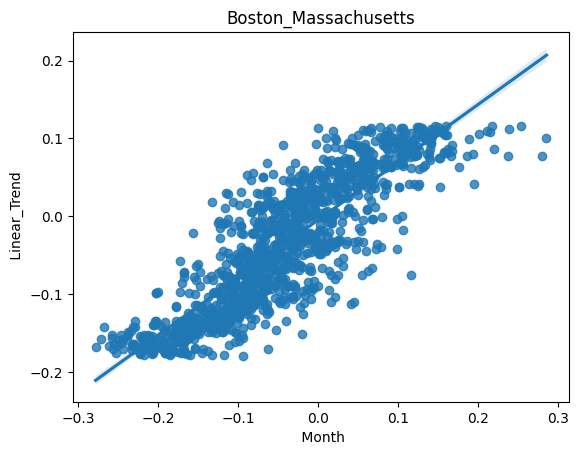

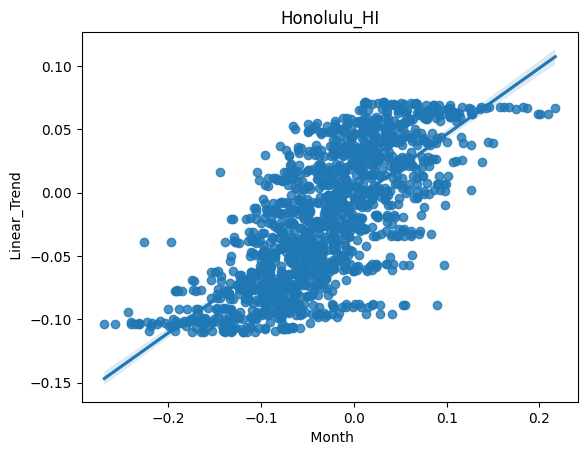

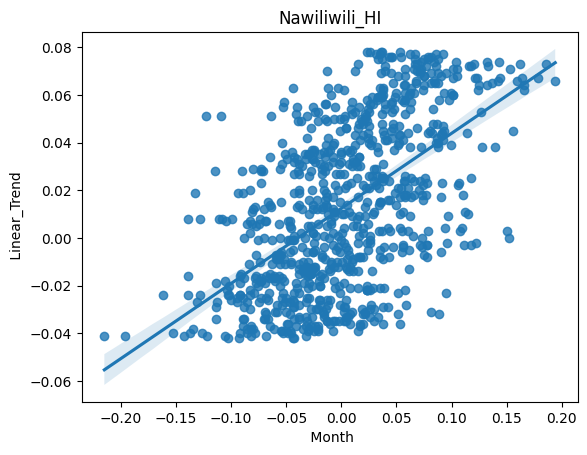

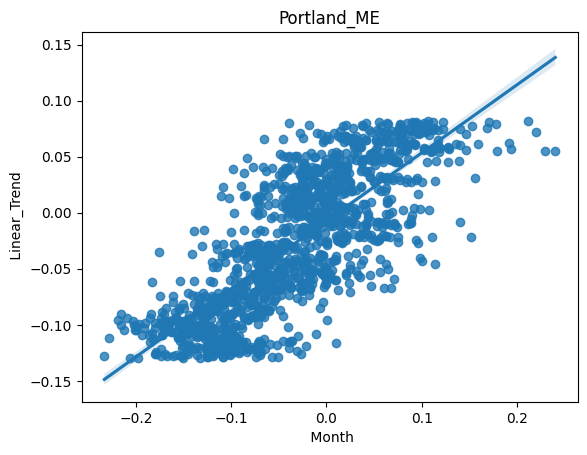

In [6]:
#Exercise 15.13: Linear Regression with Sea Level Trends
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


datasets: dict = {'Boston_Massachusetts': pd.read_csv('Boston_Massachusetts.csv'),
                  'Honolulu_HI': pd.read_csv('Honolulu_HI.csv'),
                  'Nawiliwili_HI': pd.read_csv('Nawiliwili_HI.csv'),
                  'Portland_ME':  pd.read_csv('Portland_ME.csv')
                  };


for city, dframe in datasets.items():
    
   axes = sns.regplot(data=dframe,
                x=' Month',
                y=' Linear_Trend')
   plt.title(city)
   plt.show()
   

15. 14 ***(Linear Regression with Sea Temperature Trends)*** Ocean temperatures are changing fish migratory patterns. Download NOAA's global average surface temperature anomalies time series data for 1880–2018 from \
&emsp;&emsp;&emsp;&emsp;&emsp; https://www.ncdc.noaa.gov/cag/global/time-series/globe/ocean/ytd/12/1880-2018 \
then load and plot the dataset using Seaborn's regplot function. 

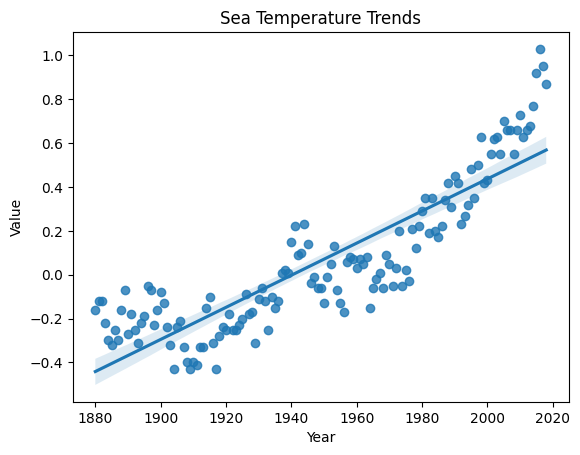

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Sea_Temperature_Trends = pd.read_csv('Sea_Temperature_Trends.csv')
        
axes = sns.regplot(data=Sea_Temperature_Trends,
                x='Year',
                y='Value')


plt.title('Sea Temperature Trends')
plt.show()

15. 15 ***(Linear Regression with the Diabetes Dataset)*** Investigate the Diabetes dataset
bundled with scikit-learn \
&emsp;&emsp;&emsp;&emsp;&emsp; https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset \
The dataset contains 442 samples, each with 10 features and a label indicating the "dis-
ease progression one year after baseline." Using this dataset, reimplement the steps of this
chapter's multiple linear regression case study in Section 15.5.


In [3]:
#Exercise 15.15:Linear Regression with the Diabetes Dataset

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_diabetes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

diabetes_ds = load_diabetes()

print(diabetes_ds.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
#Exercise 15.15:Linear Regression with the Diabetes Dataset

pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 11)
pd.set_option('display.width', None)
   
   
diabetes_df = pd.DataFrame(data= diabetes_ds.data,
                           columns=diabetes_ds.feature_names)

diabetes_df['disease progression'] = pd.Series(diabetes_ds.target)

display(diabetes_df.head())

age     sex     bmi      bp      s1      s2      s3      s4      s5  \
0  0.0381  0.0507  0.0617  0.0219 -0.0442 -0.0348 -0.0434 -0.0026  0.0199   
1 -0.0019 -0.0446 -0.0515 -0.0263 -0.0084 -0.0192  0.0744 -0.0395 -0.0683   
2  0.0853  0.0507  0.0445 -0.0057 -0.0456 -0.0342 -0.0324 -0.0026  0.0029   
3 -0.0891 -0.0446 -0.0116 -0.0367  0.0122  0.0250 -0.0360  0.0343  0.0227   
4  0.0054 -0.0446 -0.0364  0.0219  0.0039  0.0156  0.0081 -0.0026 -0.0320   

       s6  disease progression  
0 -0.0176                151.0  
1 -0.0922                 75.0  
2 -0.0259                141.0  
3 -0.0094                206.0  
4 -0.0466                135.0

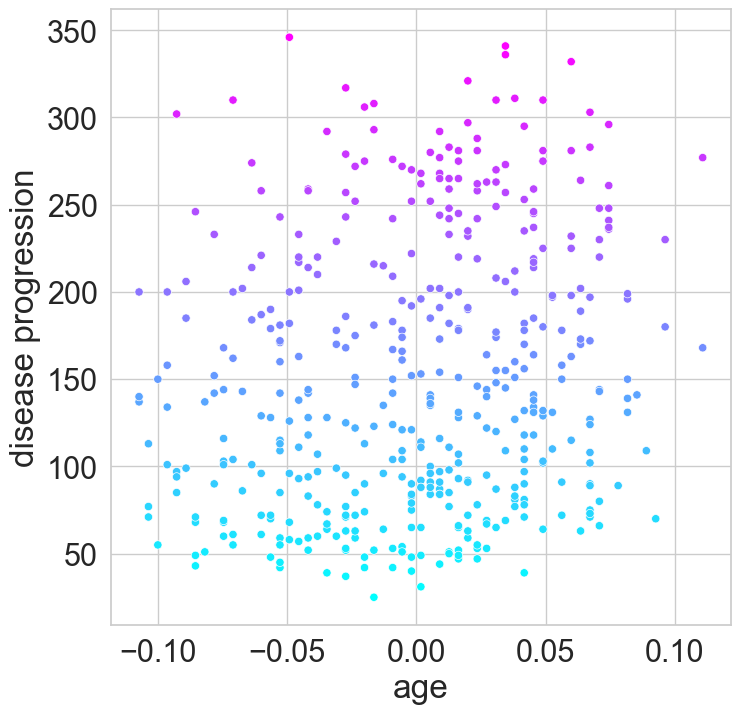

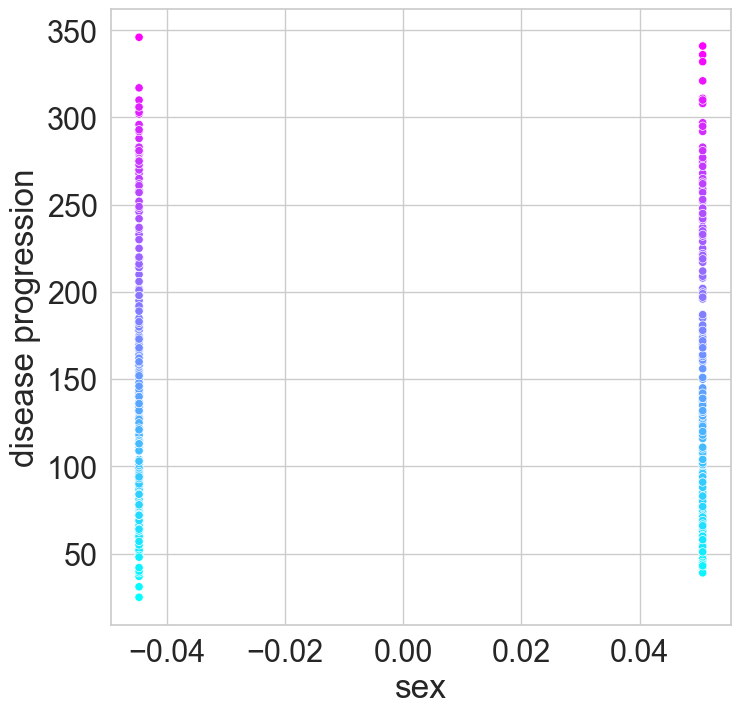

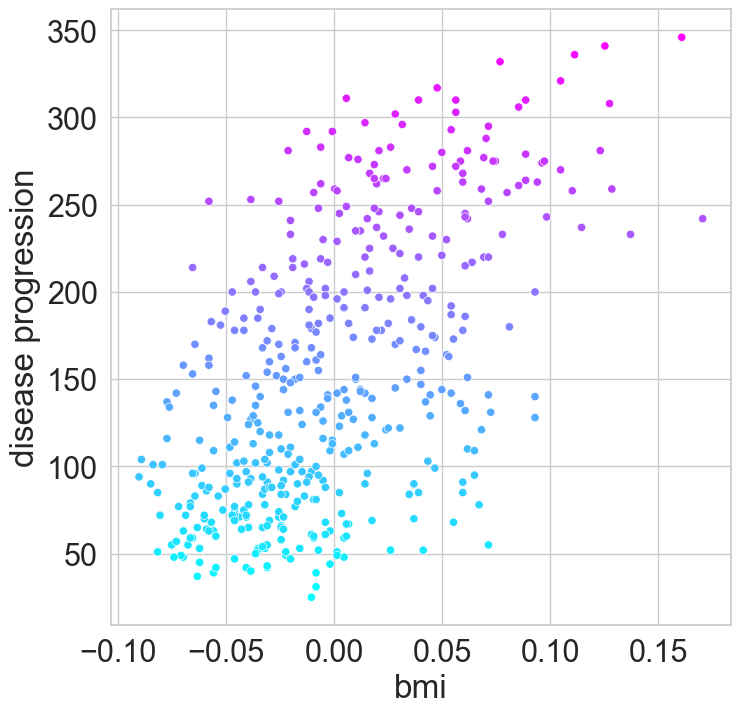

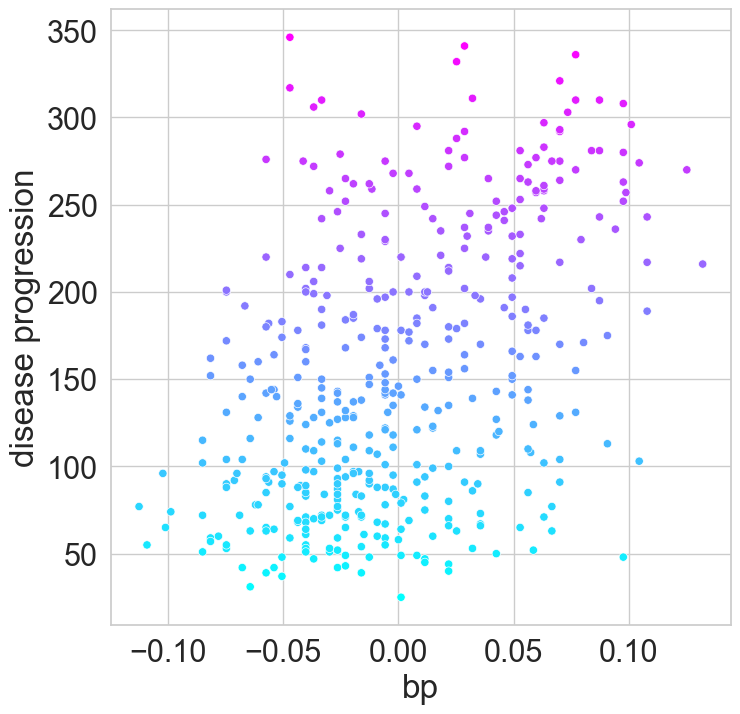

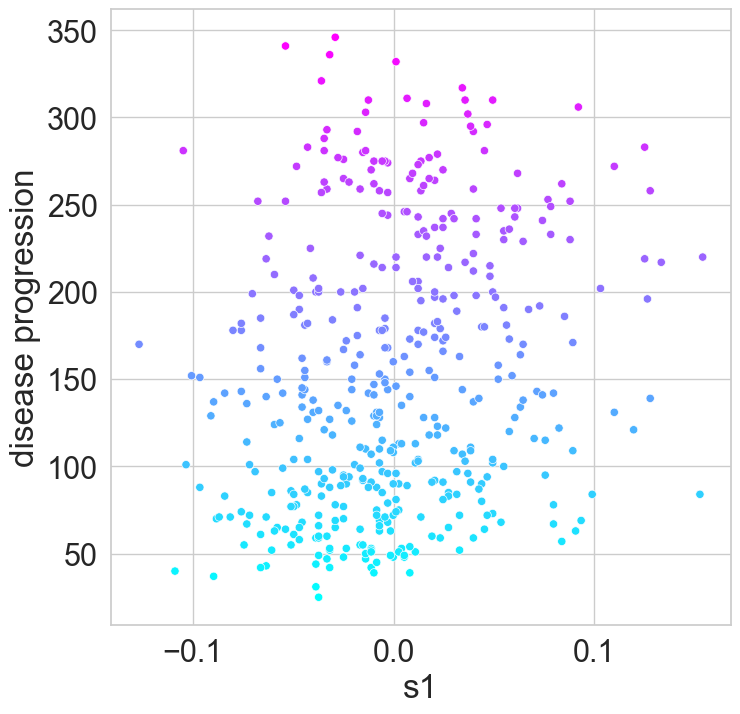

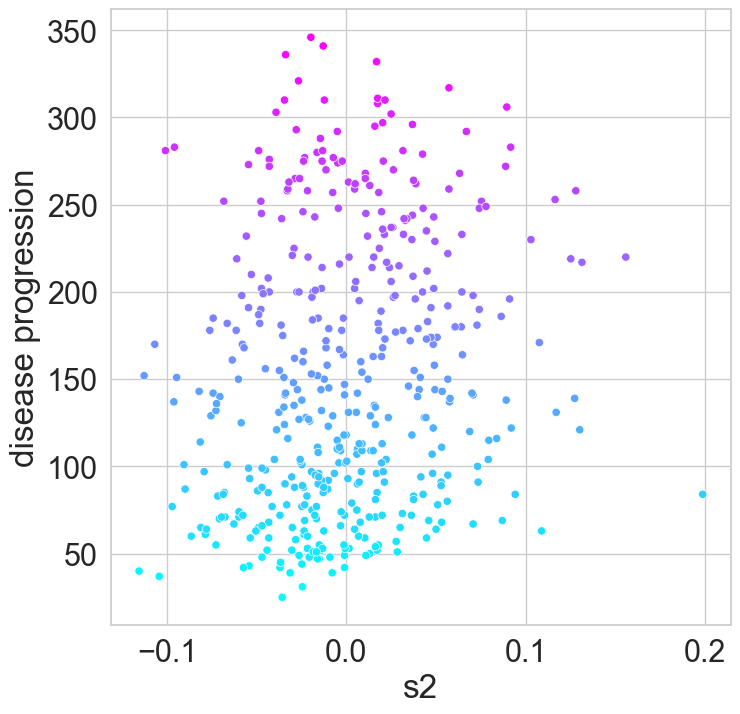

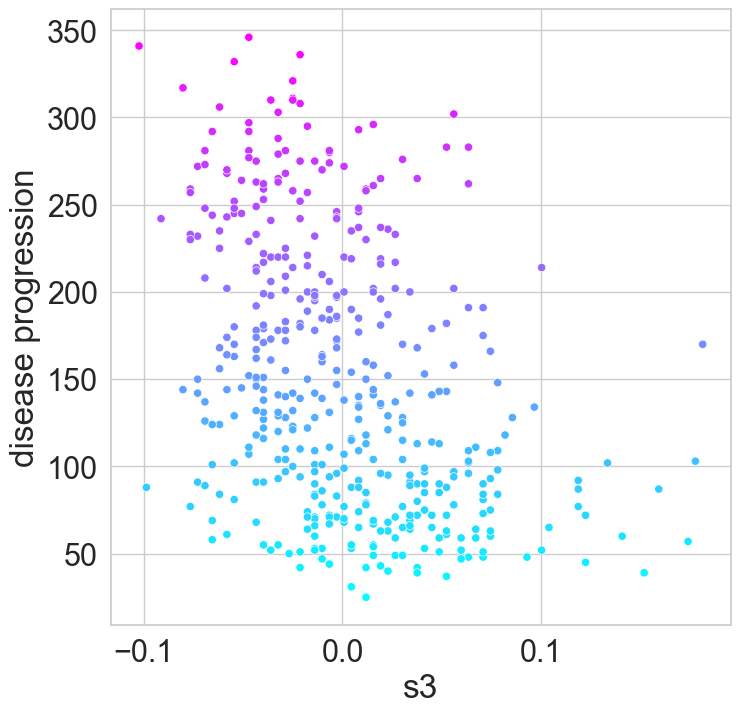

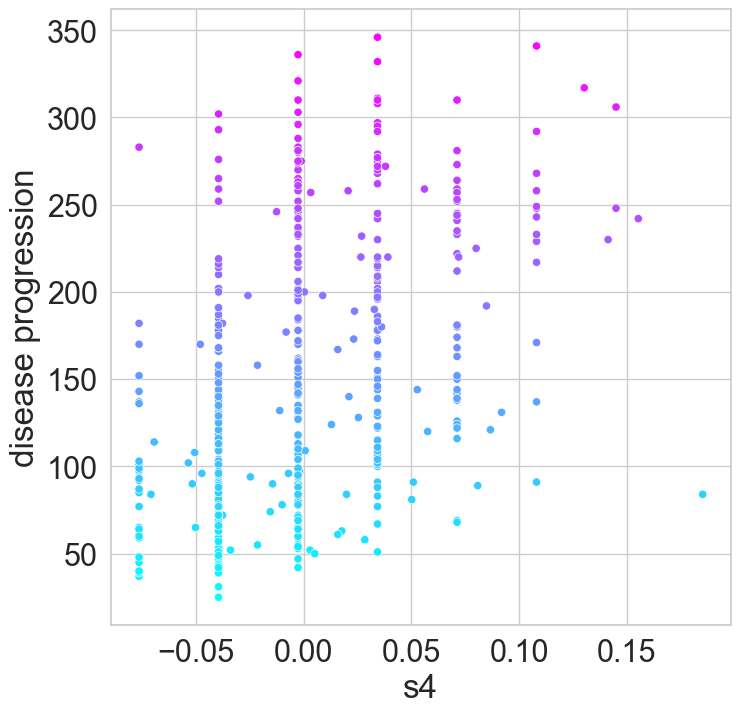

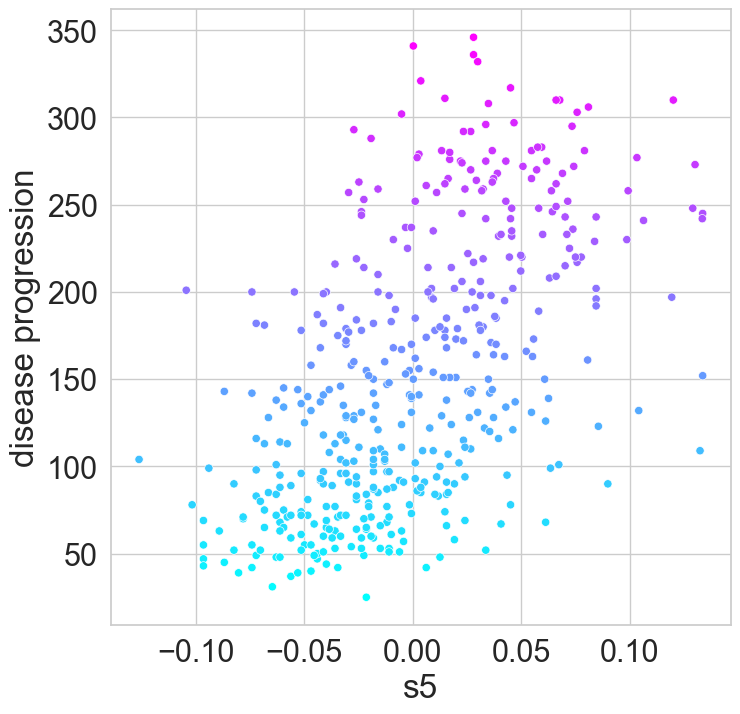

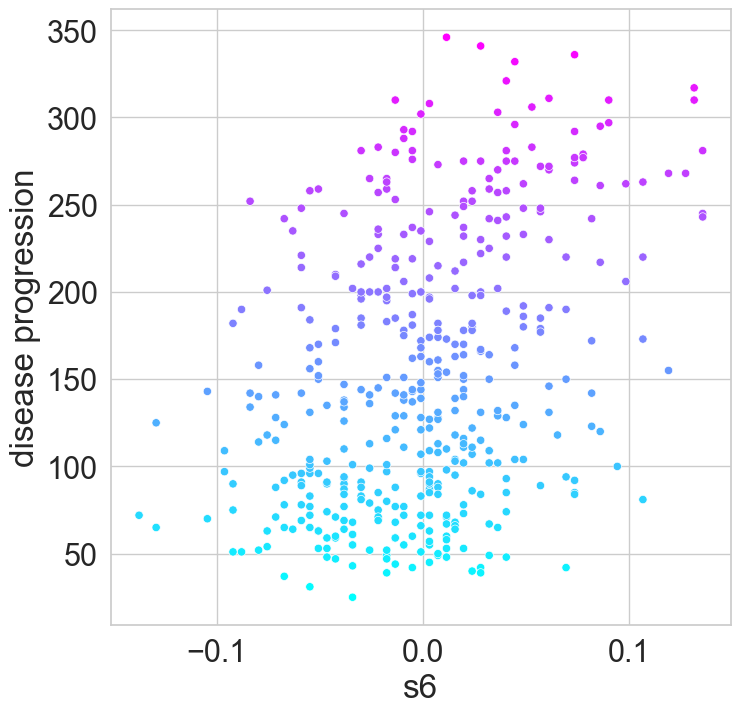

In [26]:
#Exercise 15.15:Linear Regression with the Diabetes Dataset

sns.set(font_scale=2)
sns.set_style('whitegrid')

for feature in diabetes_ds.feature_names:
     plt.figure(figsize=(8, 8))
     sns.scatterplot(data=diabetes_df, x=feature, 
                     y='disease progression', hue='disease progression', 
                     palette='cool', legend=False)



In [9]:
#Exercise 15.15:Linear Regression with the Diabetes Dataset

X_train, X_test, y_train, y_test = train_test_split(
    diabetes_ds.data, diabetes_ds.target, random_state=11
    )

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(diabetes_ds.feature_names):
    print(f'{name + ":":<4} {linear_regression.coef_[i]: }')
    
print(f'Intercept = {linear_regression.intercept_}')


age: -60.219814056772776
sex: -266.4570523220356
bmi:  523.063411259699
bp:   310.5134699670048
s1:  -336.1614738106952
s2:   137.33929238424574
s3:  -131.13923283453687
s4:  -1.1492348017316942
s5:   622.3286855688127
s6:   60.46645769168251
Intercept = 152.22822762230342


In [12]:
#Exercise 15.15:Linear Regression with the Diabetes Dataset

predicted = linear_regression.predict(X_test)
expected = y_test

print(f'Predicted: {predicted[:5]} \n Expected: {expected[:5]}')

Predicted: [115.46474836  83.4585369  160.77727376 187.65710274  72.72122197] 
 Expected: [ 79.  55. 109. 178.  39.]


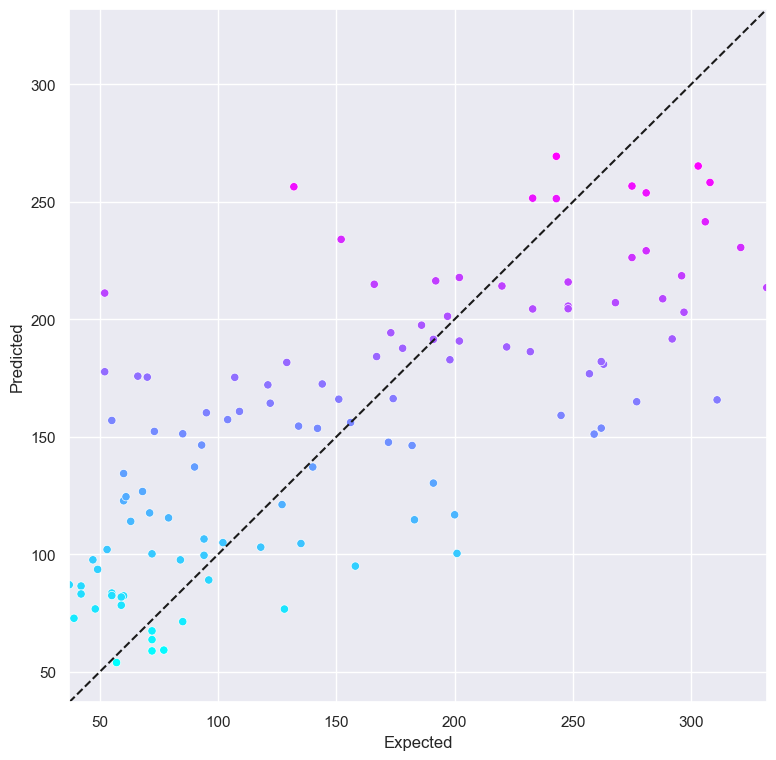

In [20]:
#Exercise 15.15:Linear Regression with the Diabetes Dataset
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

sns.set(font_scale=1)
figure = plt.figure(figsize=(9,9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
                       hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

In [27]:
#Exercise 15.15:Linear Regression with the Diabetes Dataset

print(f'R2 score: {metrics.r2_score(expected, predicted)}')
print(f'MSE: {metrics.mean_squared_error(expected, predicted)}')

R2 score: 0.5322429620529407
MSE: 3458.2307025173577


15. 16 ***(Simple Linear Regression with the California Housing Dataset)*** In the text, we
performed multiple linear regression using the California Housing dataset. When you
have meaningful features available and you have the choice between running simple and
multiple linear regression, you'll generally choose multiple linear regression to get more
sophisticated predictions. As you saw, scikit-learn's *LinearRegression* estimator uses all
the numerical features by default to perform linear regressions.\
In this exercise, you'll perform single linear regressions with each feature and compare
the prediction results to the multiple linear regression in the chapter. To do so, first split
the dataset into training and testing sets, then select one feature, as we did with the Data-Frame in this chapter's simple linear regression case study. Train the model using that one
feature and make predictions as you did in the multiple linear regression case study. Do
this for each of the eight features. Compare each simple linear regression's R2 score with
that of the multiple linear regression. What produced the best results?

In [1]:
#Exercise 15.16: Simple Linear Regression with the California Housing Dataset

from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(
                                                    california.data, 
                                                    california.target, 
                                                    random_state=11
                                                    );

linear_regression = LinearRegression()

scores: dict = dict();

for i, name in enumerate(california.feature_names):
    
    linear_regression.fit(
                        X=X_train[:, i].reshape(-1, 1), 
                        y=y_train
                        );
    
    predicted = linear_regression.predict(X=X_test[:, i].reshape(-1,1))
    
    scores[name] = r2_score(
                            y_true=y_test, 
                            y_pred=predicted
                            );
   
linear_regression.fit(
                    X=X_train,
                    y=y_train
                    );

scores['Multiple Linear Regression'] = r2_score(
                                                y_true=y_test, 
                                                y_pred=linear_regression.predict(X_test)
                                                );

for name, score in scores.items():
    print(f'Feature: {name:<2} \nscore: {score: 8.4f}\n')

best_score = max(scores.items(), key=lambda x: x[1])

print(f'The best score is {best_score[0]} with {best_score[1]:.4f}')

Feature: MedInc 
score:   0.4631

Feature: HouseAge 
score:   0.0132

Feature: AveRooms 
score:   0.0241

Feature: AveBedrms 
score:  -0.0011

Feature: Population 
score:   0.0001

Feature: AveOccup 
score:  -0.0002

Feature: Latitude 
score:   0.0204

Feature: Longitude 
score:   0.0015

Feature: Multiple Linear Regression 
score:   0.6009

The best score is Multiple Linear Regression with 0.6009


5. 17 ***(Binary Classification with the Breast Cancer Dataset)*** Check out the Breast Cancer Wisconsin Diagnostic dataset that's bundled with scikit-learn \
&emsp;&emsp;&emsp;&emsp;&emsp; https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset \
The dataset contains 569 samples, each with 30 features and a label indicating whether a tumor was malignant (0) or benign (1). There are only two labels, so this dataset is commonly used to perform **binary classification**. Using this dataset, reimplement the steps of this chapter's classification case study in Sections 15.2-15.3. Use the *GaussianNB* (short for Gaussian Naive Bayes) estimator. When you execute multiple classifiers (as in Section 15.3.3) to determine which one is best for the Breast Cancer Wisconsin Diagnostic dataset, include a *LogisticRegression* classifier in the *estimators* dictionary. Logistic regression is another popular algorithm for binary classification.

In [23]:
#Exercise 15.17: Binary Classification with the Breast Cancer Dataset

from sklearn.datasets import load_breast_cancer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd

breast_cancer = load_breast_cancer()

print(breast_cancer.DESCR)


breast_cancer_df = pd.DataFrame(data=breast_cancer.data,
                                columns=breast_cancer.feature_names)

pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', None)

display(breast_cancer_df.head())

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

mean radius  mean texture  mean perimeter  mean area  mean smoothness  ...  \
0        17.99         10.38          122.80     1001.0           0.1184  ...   
1        20.57         17.77          132.90     1326.0           0.0847  ...   
2        19.69         21.25          130.00     1203.0           0.1096  ...   
3        11.42         20.38           77.58      386.1           0.1425  ...   
4        20.29         14.34          135.10     1297.0           0.1003  ...   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  
0                   0.1189  
1                   0.0890  
2                   0.0876  
3                   0.1730  
4                   0.0768  

[5 rows x 30 columns]

In [26]:
#Exercise 15.17: Binary Classification with the Breast Cancer Dataset

X_train ,X_test, y_train, y_test = train_test_split(breast_cancer.data,
                                                    breast_cancer.target,
                                                    random_state=11)


gaussian_nb = GaussianNB()


gaussian_nb.fit(X=X_train, y=y_train)

predicted = gaussian_nb.predict(X=X_test)
expected = y_test


print(f'prediction accuracy percentage: {(expected.size - (expected != predicted).sum()) / expected.size:.3%}')
print(f'Estimator Method score: {gaussian_nb.score(X_test, y_test):.3%}')


prediction accuracy percentage: 95.105%
Estimator Method score: 95.105%


In [14]:
#Exercise 15.17: Binary Classification with the Breast Cancer Dataset
print('\t\t\tClassification Report')
print(classification_report(y_true=expected,
                            y_pred=predicted,
                            target_names=breast_cancer.target_names))

confusion_df = confusion_matrix(y_true=expected, 
                                y_pred=predicted)

confusion_df = pd.DataFrame(data=confusion_df,
                            index=breast_cancer.target_names,
                            columns=breast_cancer.target_names)

print('\n\t Confusion Matrix')
display(confusion_df.style.background_gradient(cmap="magma"))


			Classification Report
              precision    recall  f1-score   support

   malignant       0.98      0.88      0.93        50
      benign       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143


	 Confusion Matrix


In [5]:
#Exercise 15.17: Binary Classification with the Breast Cancer Dataset

estimators: dict = {
    'GaussianNB':gaussian_nb ,
    'KNeighborsClassifier':KNeighborsClassifier() ,
    'SVC':SVC() ,
    'LogisticRegression':LogisticRegression(solver='lbfgs',
                                            max_iter=3000) 
    };

for estimator_name, estimator_object in estimators.items():
    
     kfold = KFold(n_splits=10, 
                   random_state=11, 
                   shuffle=True
                   );
     
     scores = cross_val_score(estimator=estimator_object,
                              X=breast_cancer.data, 
                              y=breast_cancer.target, 
                              cv=kfold
                              );
     
     print(f'{estimator_name:>20}: '  
           + f'mean accuracy={scores.mean():.2%}; ' 
           + f'standard deviation={scores.std():.2%}')

          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%
KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%
  LogisticRegression: mean accuracy=95.08%; standard deviation=3.02%


15. 18 ***(Project: Determine k in k-Means Clustering)*** In the *k-NN* classification example, we demonstrated hyperparameter tuning to choose the best value of *k*. In k-means clustering, a challenge is determining the appropriate *k* value for clustering the data. One technique for determining *k* is called the *elbow method*. Investigate the *elbow method*, then use it with the Digits and Iris datasets to determine whether this technique yields the cor- rect number of classes for each dataset.

In [1]:
#Exercise 15.18: Determine k in K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits, load_iris
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import pandas as pd

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


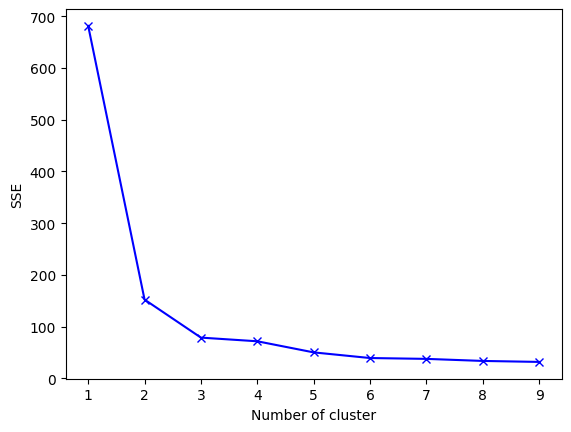

In [2]:
#Exercise 15.18: Determine k in K-Means Clustering
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
print(data)


sse = dict()
for k in range(1, 10):
    
    kmeans = KMeans(n_clusters=k, 
                    n_init='auto', 
                    random_state=11
                    )
    kmeans.fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


Text(0.5, 1.0, 'k-means')

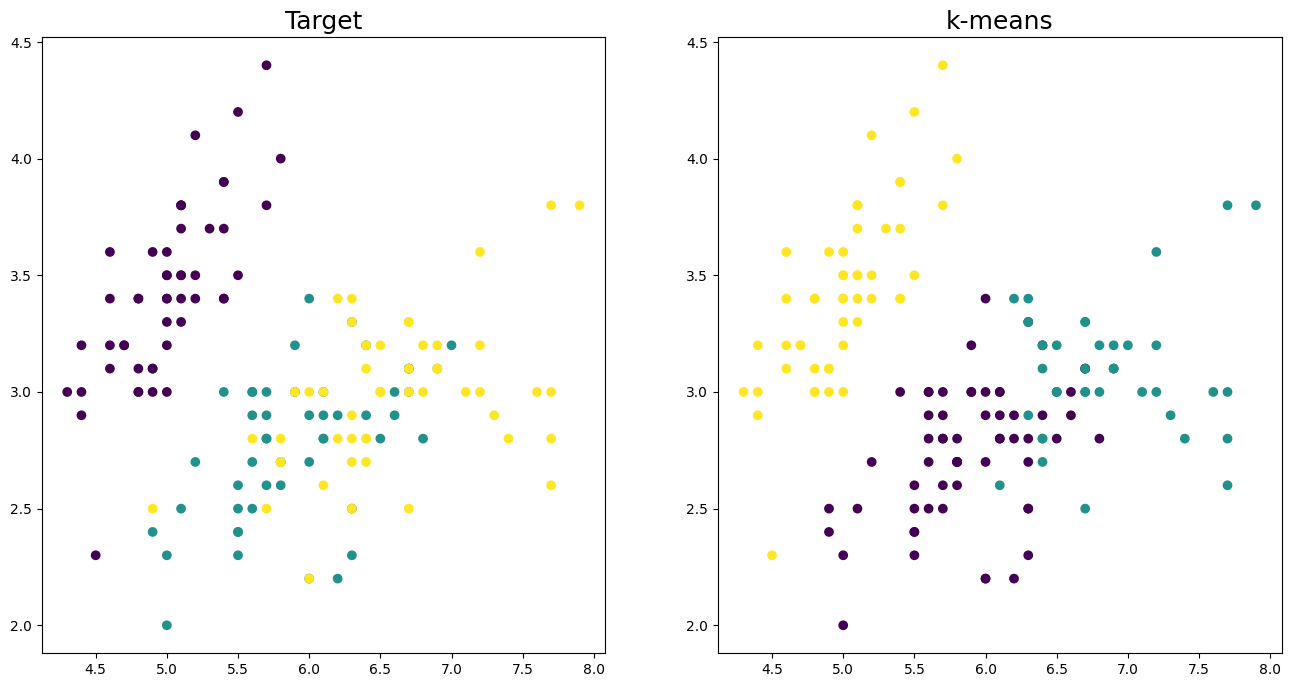

In [5]:
#Exercise 15.18: Determine k in K-Means Clustering
kmeans = KMeans(n_clusters=3, 
                n_init='auto', 
                random_state=11
                ).fit(data)

data['kmeans'] = kmeans.predict(data)
data['target'] =  iris.target


fig, axes = plt.subplots(1, 2, figsize=(16,8)) 
axes[0].scatter(data.iloc[:,0], data.iloc[:,1], c=data['target'])
axes[1].scatter(data.iloc[:, 0], data.iloc[:,1], c=data['kmeans'])
axes[0].set_title('Target', fontsize=18)
axes[1].set_title('k-means', fontsize=18)


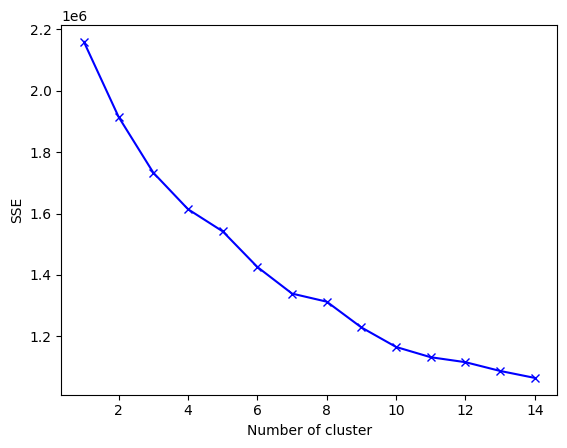

In [8]:
#Exercise 15.18: Determine k in K-Means Clustering
digits = load_digits()

sse = dict()
for k in range(1, 15):
    
    kmeans = KMeans(n_clusters=k, 
                    n_init='auto', 
                    random_state=11
                    )
    kmeans.fit(digits.data)
    sse[k] = kmeans.inertia_ 
    
    
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [9]:
#Exercise 15.18: Determine k in K-Means Clustering
kmeans = KMeans(n_clusters=10, 
                n_init='auto', 
                random_state=11
                ).fit(digits.data)

confusion_df = confusion_matrix(
    y_true=digits.target, 
    y_pred=kmeans.predict(digits.data)
    )

confusion_df = pd.DataFrame(data=confusion_df,
                            index=range(10),
                            columns=range(10)
                            )

display(confusion_df)


0    1    2    3    4    5   6    7    8    9
0    0    0    0    0  177    0   0    0    0    1
1   99    0    2    0    0   24  55    1    1    0
2    8    2    0    3    1  148   2   13    0    0
3    7    8    0    7    0    1   0  158    2    0
4    4    0    0    8    0    0   7    0    0  162
5    0   41    1    0    0    0   0    2  136    2
6    2    0  177    0    1    0   1    0    0    0
7    2    0    0  175    0    0   2    0    0    0
8  103   48    2    4    0    3   6    4    4    0
9    2  138    0    7    0    0  20    7    6    0

15. 19 ***(Project: Automated Hyperparameter Tuning)*** It's relatively easy to tune one hyperparameter using the looping technique we presented in Section 15.3.4 for determining *k* value in *k-nearest neighbors* algorithm. What if you need to tune more than one hyperparameter? Scikit-learn's *sklearn.model_selection* module provides tools for automated hyperparameter tuning to help you with this task. Class **GridSearchCV** uses a brute-force approach to hyperparameter tuning by trying every possible combination of the hyperparameters and value ranges for each that you specify. Class **RandomizedSearchCV** improves tuning performance by using random samples of the hyperparameter values you specify. Investigate these classes then reimplement the hyperparameter tuning in Section 15.3.4 using each class. Time the results of each approach.

In [1]:
#Exercise 15.19: Automated Hyperparameter Tuning
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.datasets import load_digits

import pandas as pd

digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target, 
                                                    random_state=11)

knn = KNeighborsClassifier()
params = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'p': [1,2]
    };

grid = GridSearchCV(estimator=knn,
                    param_grid=params,
                    cv=10,
                    n_jobs=5
                    )
grid.fit(X_train,y_train)


grid_df = pd.DataFrame(grid.cv_results_)
grid_df = grid_df[
        ['param_n_neighbors',
         'param_p',
         'param_weights',
         'mean_score_time', 
         'std_score_time',
         'mean_test_score',
         'std_test_score']
        ];

display(grid_df)

print(f'Best params: {grid.best_params_}')
print(f'Best score: {grid.best_score_:.3%}')

param_n_neighbors param_p param_weights  mean_score_time  std_score_time  \
0                  1       1       uniform         0.059030        0.038880   
1                  1       1      distance         0.014304        0.001648   
2                  1       2       uniform         0.011436        0.001237   
3                  1       2      distance         0.005176        0.001816   
4                  3       1       uniform         0.022682        0.003427   
5                  3       1      distance         0.015320        0.002316   
6                  3       2       uniform         0.012340        0.002170   
7                  3       2      distance         0.005049        0.001358   
8                  5       1       uniform         0.019843        0.003440   
9                  5       1      distance         0.015205        0.001928   
10                 5       2       uniform         0.010877        0.001784   
11                 5       2      distance         0.005143        0.001182   
12                 7       1       uniform         0.021682        0.002435   
13                 7       1      distance         0.015340        0.001898   
14                 7       2       uniform         0.011719        0.001390   
15                 7       2      distance         0.004294        0.001863   
16                 9       1       uniform         0.021337        0.003914   
17                 9       1      distance         0.014821        0.001658   
18                 9       2       uniform         0.011754        0.001345   
19                 9       2      distance         0.004798        0.001394   
20                11       1       uniform         0.021977        0.002783   
21                11       1      distance         0.016901        0.001478   
22                11       2       uniform         0.011640        0.001978   
23                11       2      distance         0.005613        0.000648   
24                13       1       uniform         0.022259        0.002788   
25                13       1      distance         0.013594        0.001668   
26                13       2       uniform         0.011484        0.001676   
27                13       2      distance         0.004258        0.001436   
28                15       1       uniform         0.020372        0.002129   
29                15       1      distance         0.015694        0.001904   
30                15       2       uniform         0.012490        0.000986   
31                15       2      distance         0.005429        0.000960   
32                17       1       uniform         0.024637        0.002900   
33                17       1      distance         0.013723        0.002311   
34                17       2       uniform         0.013294        0.002342   
35                17       2      distance         0.006210        0.000892   
36                19       1       uniform         0.022243        0.002401   
37                19       1      distance         0.015969        0.001853   
38                19       2       uniform         0.012132        0.001903   
39                19       2      distance         0.006514        0.001410   

    mean_test_score  std_test_score  
0          0.982930        0.009991  
1          0.982930        0.009991  
2          0.984428        0.008407  
3          0.984428        0.008407  
4          0.984422        0.009628  
5          0.985163        0.009370  
6          0.986650        0.007256  
7          0.986650        0.007256  
8          0.982946        0.010494  
9          0.983687        0.010364  
10         0.984428        0.009641  
11         0.985915        0.008414  
12         0.980719        0.010030  
13         0.980719        0.011070  
14         0.983682        0.010914  
15         0.984422        0.010214  
16         0.977745        0.012837  
17         0.979978        0.012415  
18         0.981465        0.013763  
19 

Best params: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Best score: 98.665%


In [2]:
#Exercise 15.19: Automated Hyperparameter Tuning

rs = RandomizedSearchCV(estimator=knn,
                        param_distributions=params,
                        cv=10,
                        n_jobs=5)

rs.fit(X=X_train, y=y_train)

rs_df = pd.DataFrame(data=rs.cv_results_)

rs_df = rs_df[
        ['param_n_neighbors',
         'param_p',
         'param_weights',
         'mean_score_time', 
         'std_score_time',
         'mean_test_score',
         'std_test_score']
        ];

rs_df.sort_values(by='param_n_neighbors', inplace=True)

display(rs_df)
print(f'Best params: {rs.best_params_}')
print(f'Best score: {rs.best_score_:.3%}')

param_n_neighbors param_p param_weights  mean_score_time  std_score_time  \
9                 1       2      distance         0.005978        0.001193   
3                 3       1      distance         0.015094        0.001260   
0                 5       2      distance         0.005932        0.001887   
5                 5       1      distance         0.020014        0.003957   
2                 7       2      distance         0.007552        0.002236   
6                 7       2       uniform         0.015401        0.004228   
4                11       1      distance         0.017046        0.001801   
7                11       2       uniform         0.016265        0.002362   
8                15       1       uniform         0.025492        0.003550   
1                19       2      distance         0.007908        0.001633   

   mean_test_score  std_test_score  
9         0.984428        0.008407  
3         0.985163        0.009370  
0         0.985915        0.008414  
5         0.983687        0.010364  
2         0.984422        0.010214  
6         0.983682        0.010914  
4         0.975511        0.017286  
7         0.979226        0.015160  
8         0.968828        0.020744  
1         0.974035        0.017664

Best params: {'weights': 'distance', 'p': 2, 'n_neighbors': 5}
Best score: 98.591%


15. 20 ***(Quandl Financial Time Series)*** Quandl offers an enormous number of financial
time series and a Python library for loading them as pandas *DataFrames*, making them easy
to use in your machine learning studies. Many of the time series are free. Explore Quandl's
financial data search engine at \
&emsp;&emsp;&emsp;&emsp;&emsp; https://www.quandl.com/search \
to see the range of time series data they offer. Investigate and install their Python module \
&emsp;&emsp;&emsp;&emsp;&emsp; *conda install -c conda-forge quandl* \
then use it to download their *'YALE/SPCOMP'* time series for the S&P Composite index
(or another time series of your choice). Next, using time series data you downloaded, per-
form the steps in the linear regression case study of Section 15.5. Use only rows for which
all the features have values.

In [4]:
# Exercise 15.20: Quandl Financial Time Series

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge

from sklearn.model_selection import train_test_split , cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Exploring the Data #
yale_spcom = pd.read_csv('YALE-SPCOMP.csv')

display(yale_spcom)

yale_spcom = yale_spcom.select_dtypes(include='number')

yale_spcom.dropna(inplace=True)
yale_spcom.set_index(pd.RangeIndex(yale_spcom.shape[0]), inplace=True)

print()
display(yale_spcom)


Year  S&P Composite   Dividend  Earnings         CPI  \
0     2017-11-30        2579.85        NaN       NaN  247.794000   
1     2017-10-31        2557.00        NaN       NaN  247.469000   
2     2017-09-30        2492.84  48.170000       NaN  246.819000   
3     2017-08-31        2456.22  47.853333       NaN  245.519000   
4     2017-07-31        2454.10  47.536667       NaN  244.786000   
...          ...            ...        ...       ...         ...   
1758  1871-05-31           4.86   0.260000       0.4   12.273812   
1759  1871-04-30           4.74   0.260000       0.4   12.559226   
1760  1871-03-31           4.61   0.260000       0.4   13.034972   
1761  1871-02-28           4.50   0.260000       0.4   12.844641   
1762  1871-01-31           4.44   0.260000       0.4   12.464061   

      Long Interest Rate   Real Price  Real Dividend  Real Earnings  \
0            2017.000000  2579.850000            NaN            NaN   
1               2.330000  2560.358097            NaN            NaN   
2               2.200000  2502.687374      48.360284            NaN   
3               2.210000  2478.979544      48.296746            NaN   
4               2.320000  2484.256679      48.120811            NaN   
...                  ...          ...            ...            ...   
1758            5.333333    98.117755       5.249098       8.075535   
1759            5.330000    93.520374       5.129810       7.892015   
1760            5.326667    87.635811       4.942584       7.603975   
1761            5.323333    86.812311       5.015822       7.716650   
1762            5.320000    88.270215       5.168977       7.952272   

      Cyclically Adjusted PE Ratio  
0                        31.304062  
1                        31.048563  
2                        30.315082  
3                        29.986307  
4                        30.002221  
...                            ...  
1758                           NaN  
1759                           NaN  
1760                           NaN  
1761                           NaN  
1762                           NaN  

[1763 rows x 10 columns]

S&P Composite   Dividend    Earnings         CPI  Long Interest Rate  \
0           2433.99  47.220000  104.020000  244.955000            2.190000   
1           2395.35  46.940000  102.776667  244.733000            2.300000   
2           2359.31  46.660000  101.533333  244.524000            2.300000   
3           2366.82  46.380000  100.290000  243.801000            2.480000   
4           2329.91  46.153333   98.376667  243.603000            2.420000   
...             ...        ...         ...         ...                 ...   
1633           6.50   0.285000    0.469200    9.514585            3.673333   
1634           6.22   0.280000    0.473300    9.609669            3.680000   
1635           6.24   0.275000    0.477500    9.514585            3.686667   
1636           6.17   0.270000    0.481700    9.514585            3.693333   
1637           6.19   0.265000    0.485800    9.419420            3.700000   

       Real Price  Real Dividend  Real Earnings  Cyclically Adjusted PE Ratio  
0     2462.199661      47.767274     105.225580                     29.748503  
1     2425.309860      47.527102     104.062147                     29.313345  
2     2390.860865      47.283980     102.891131                     28.904246  
3     2405.584042      47.139617     101.932561                     29.086922  
4     2369.994288      46.947366     100.069161                     28.655107  
...           ...            ...            ...                           ...  
1633   169.283366       7.422425      12.219655                     18.869719  
1634   160.388314       7.220053      12.204468                     17.950108  
1635   162.512032       7.161989      12.435817                     18.270119  
1636   160.688980       7.031771      12.545200                     18.147258  
1637   162.838570       6.971280      12.779803                     18.473952  

[1638 rows x 9 columns]

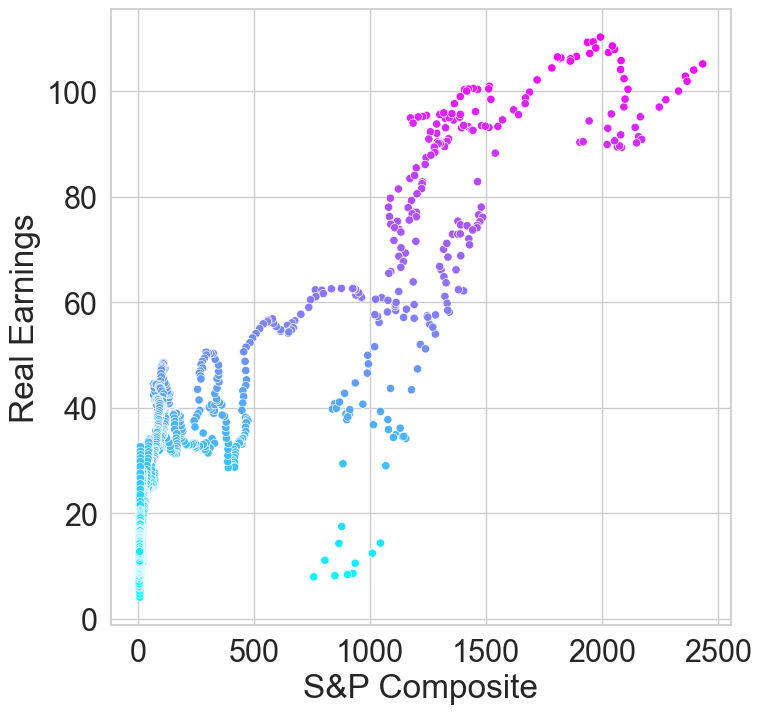

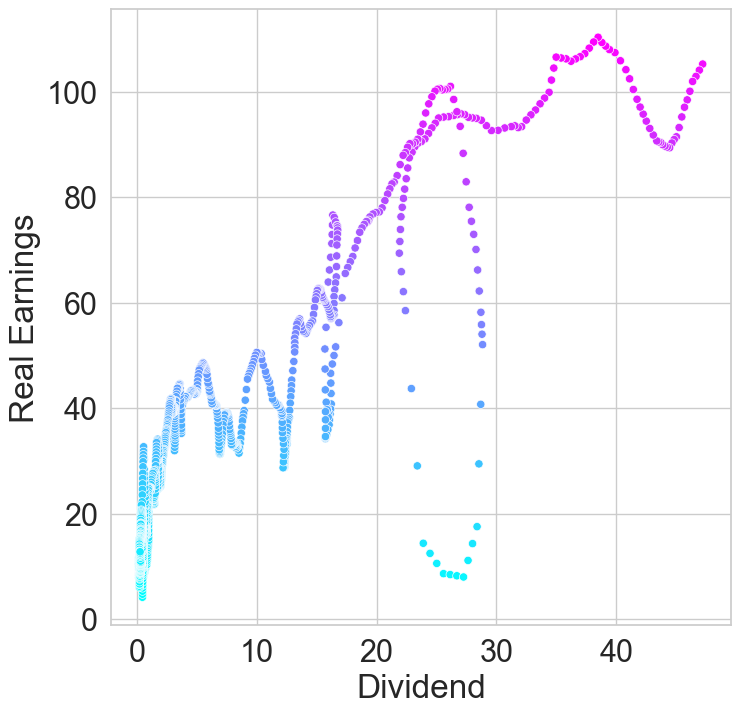

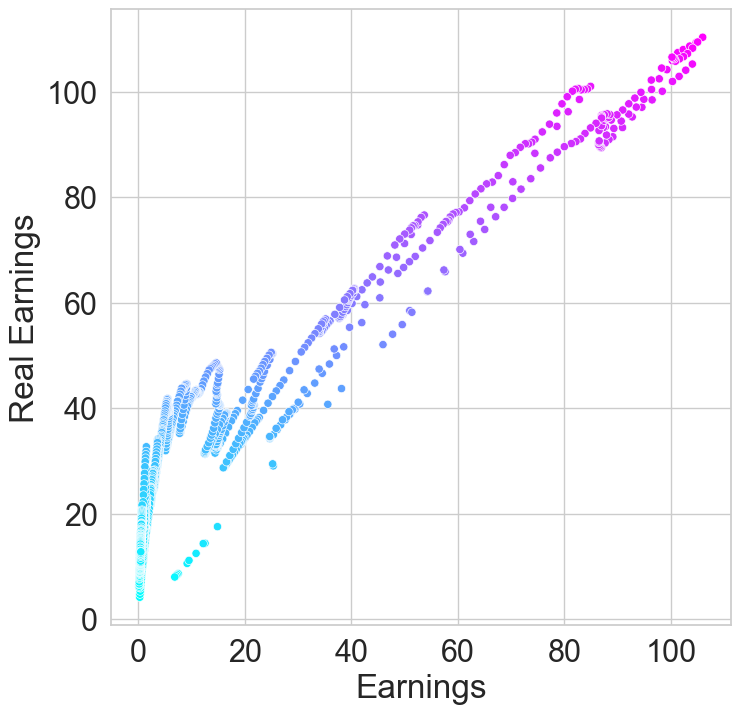

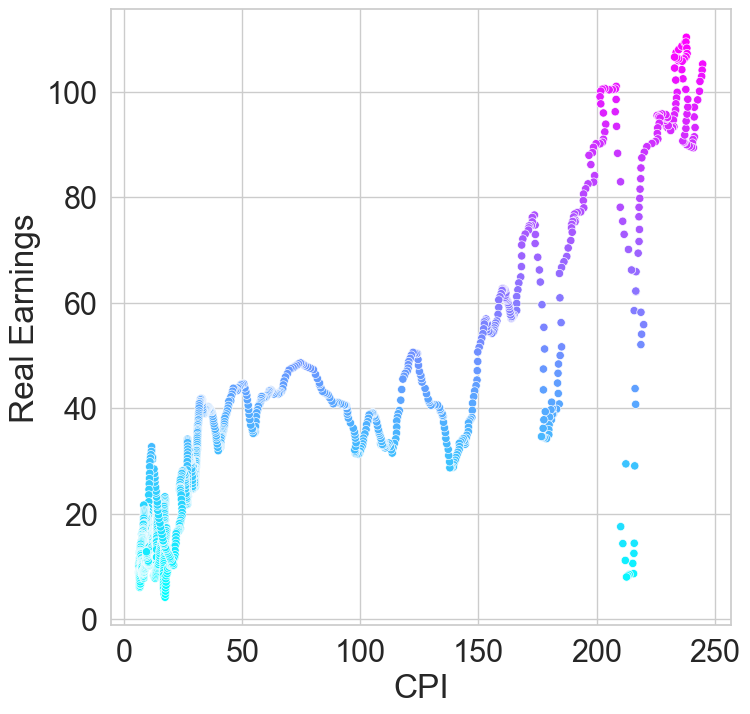

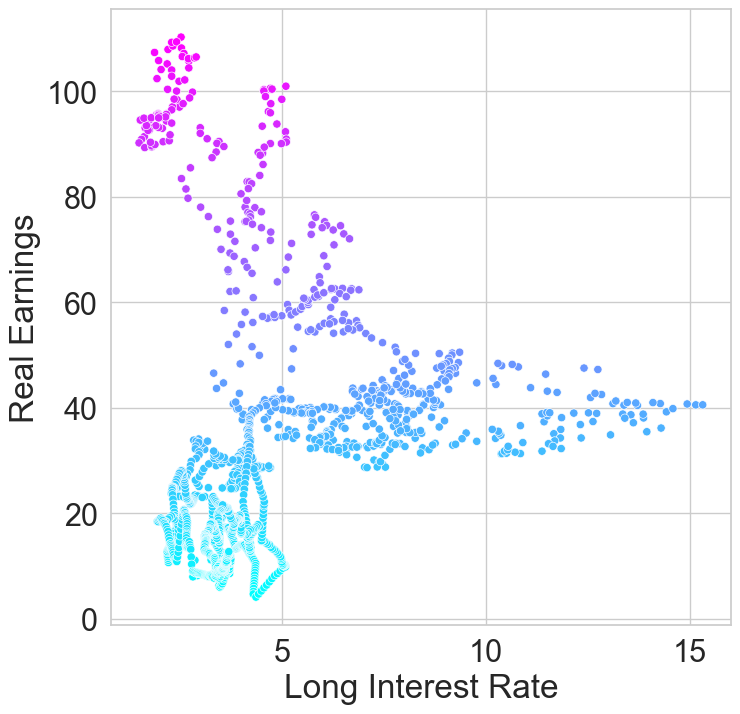

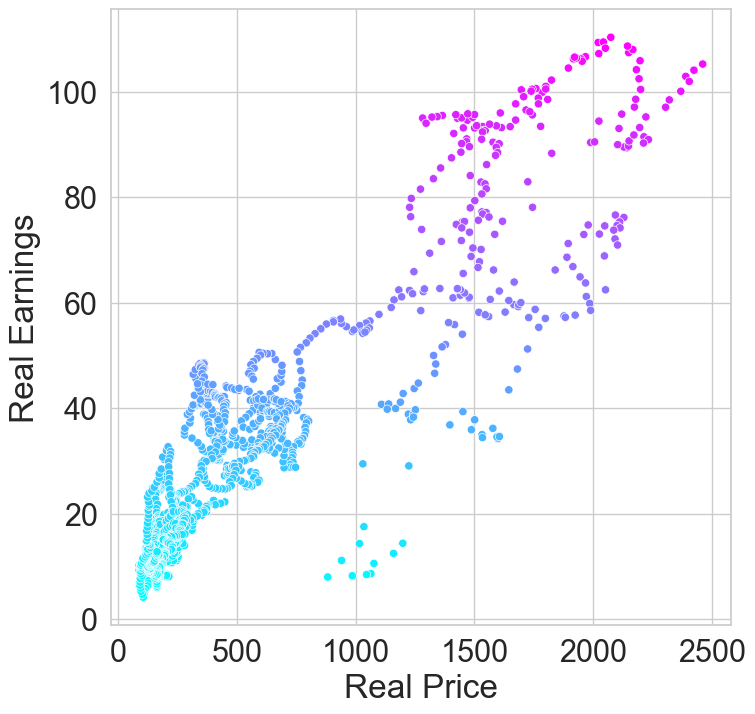

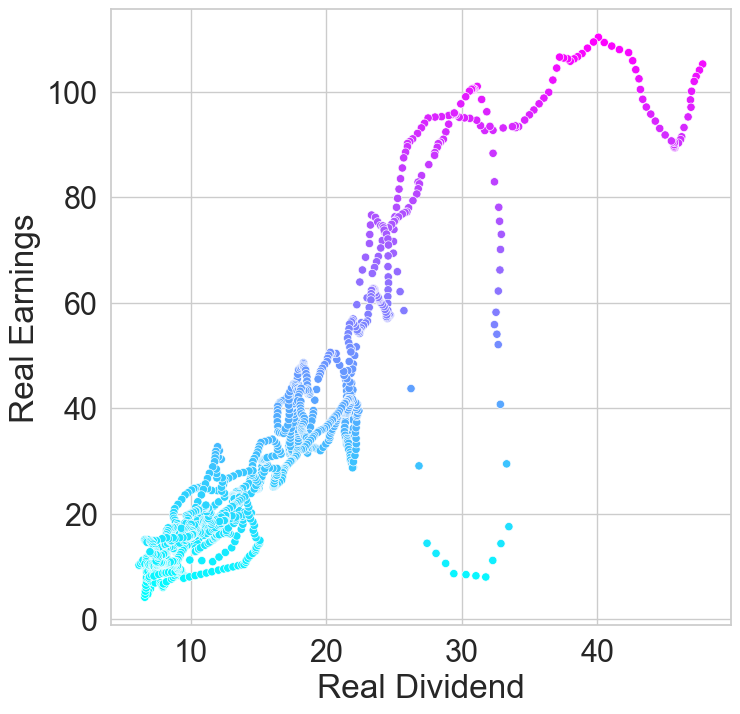

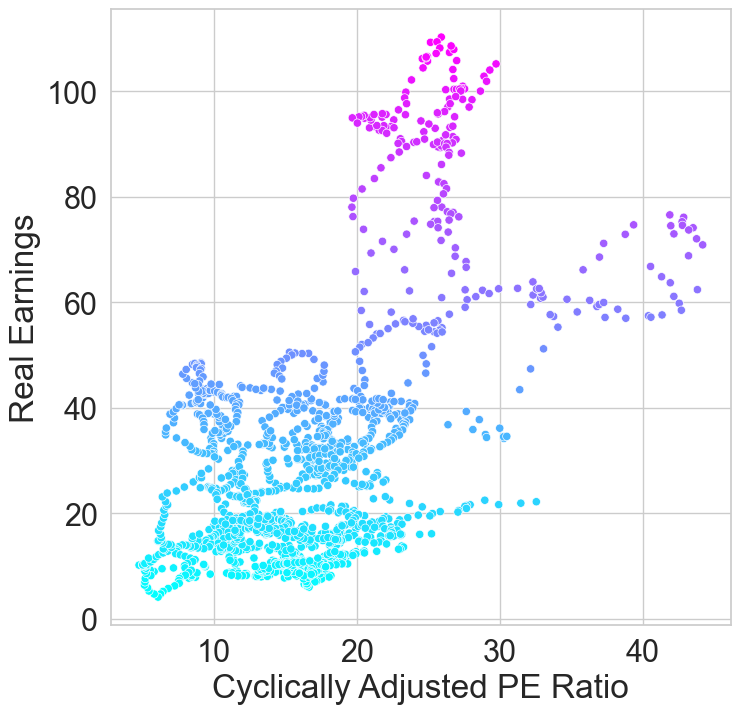

In [7]:
# Exercise 15.20: Quandl Financial Time Series

# Visualizing the Features #

sns.set(font_scale=2)
sns.set_style('whitegrid')   

for feature in yale_spcom.columns:
    if feature != 'Real Earnings':
        plt.figure(figsize=(8, 8))
        sns.scatterplot(data=yale_spcom, 
                        x=feature,
                        y='Real Earnings',
                        hue='Real Earnings',
                        palette='cool',
                        legend=False
                        )

In [13]:
# Exercise 15.20: Quandl Financial Time Series

#  Splitting the Data for Training and Testing #
yale_spcom_data = yale_spcom.drop(columns='Real Earnings')
yale_spcom_target = yale_spcom.loc[:,'Real Earnings']


X_train, X_test, y_train, y_test = train_test_split(
                                                    yale_spcom_data,
                                                    yale_spcom_target,
                                                    random_state=11
                                                    )

# Training the Model #

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

print(f'\n{"Coefficients":>40}\n')

for i, name in enumerate(yale_spcom_data.columns):
    print(f'{name:>30}: {linear_regression.coef_[i]: }')
    
print(f'\n{"Intercept":>30}: {linear_regression.intercept_: }')

# Testing the Model #

predicted = linear_regression.predict(X_test)

print(f'\nPredicted: {predicted[:5]} \n Expected: {y_test[:5].values}')


                            Coefficients

                 S&P Composite: -0.018624369617803685
                      Dividend: -1.8687875557940519
                      Earnings:  1.2039490455979671
                           CPI:  0.0014498555003550628
            Long Interest Rate:  0.5015867585976066
                    Real Price:  0.01996144873726169
                 Real Dividend:  1.487676299780987
  Cyclically Adjusted PE Ratio: -0.2638314874326942

                     Intercept: -0.9685056772179372

Predicted: [21.19195264 10.80182973 10.3763483  14.66909038 19.58470818] 
 Expected: [20.27929007  9.75257981  9.33339316 16.02782265 17.74401425]


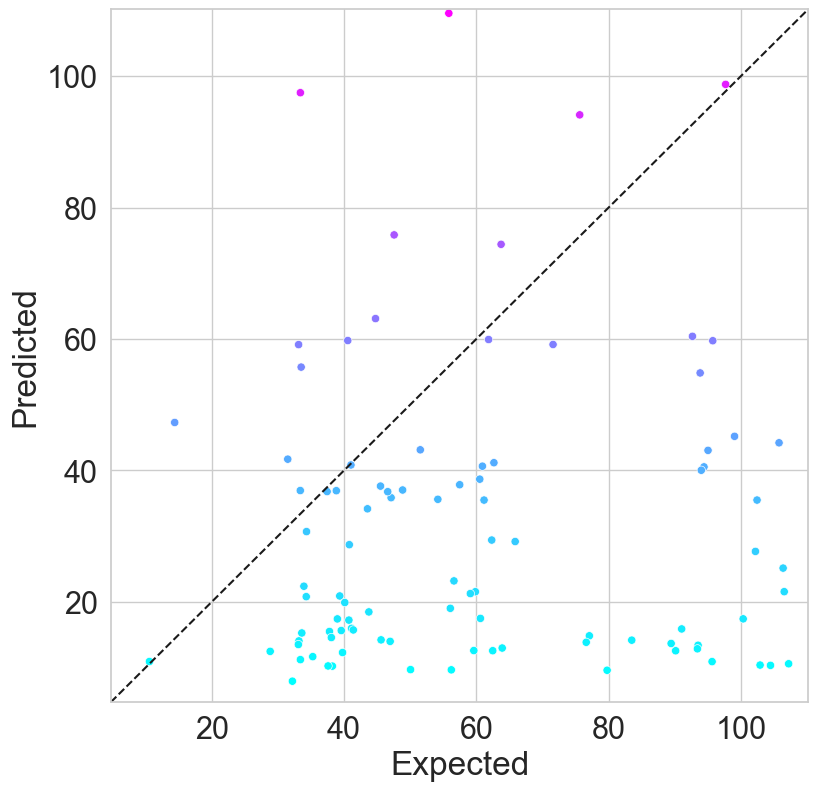

In [16]:
# Exercise 15.20: Quandl Financial Time Series

# Visualizing the Expected vs. Predicted  Earnings #

df = pd.DataFrame()
df['Predicted'] = pd.Series(predicted)
df['Expected'] = y_test

figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
     hue='Predicted', palette='cool', legend=False)

start = min(y_test.min(), predicted.min())

end = max(y_test.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')


In [17]:
# Exercise 15.20: Quandl Financial Time Series

# Scoring #

print(f'R2 score: {r2_score(y_pred=predicted, y_true=y_test):}')
print(f'Mean Square Error: {mean_squared_error(y_pred=predicted, y_true=y_test):}')


R2 score: 0.9797681212195659
Mean Square Error: 10.271735097720788


In [21]:
# Exercise 15.20: Quandl Financial Time Series

# Testing Other Models

estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(max_iter=10**5),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
    
     kfold = KFold(n_splits=10, 
                   random_state=11, 
                   shuffle=True
                   )
     
     scores = cross_val_score(estimator=estimator_object, 
                              X=yale_spcom_data, 
                              y=yale_spcom_target, 
                              cv=kfold,
                              scoring='r2'
                              )
     print(f'{estimator_name:}: \n mean of r2 scores={scores.mean():.5f}\n')

LinearRegression: 
 mean of r2 scores=0.98220

ElasticNet: 
 mean of r2 scores=0.97898

Lasso: 
 mean of r2 scores=0.97768

Ridge: 
 mean of r2 scores=0.98220



15. 21 ***(Project: Multi-Classification of Digits with the MNIST Dataset)*** In this chapter,
we analyzed the Digits dataset that's bundled with scikit-learn. This is a subset and simplified version of the original *MNIST* dataset, which provides 70,000 digit-image samples
and targets. Each sample represents a 28-by-28 image (784 features). Reimplement this
chapter's digits classification case study using *MNIST*. You can download *MNIST* in
scikit-learn using the following statements:

```python
            from sklearn.datasets import fetch_openml
            mnist = fetch_openml('mnist_784', version=1, return_X_y=True)
```

Function *fetch_mldata* downloads datasets from *mldata.org*, which contains nearly
900 machine learning datasets and various ways to search them.

In [1]:
#Exercise 15.21: Multi-Classification of Digits with the MNIST Dataset

from sklearn.datasets import fetch_openml

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix,  classification_report

import matplotlib.pyplot as plt

import pandas as pd

mnist = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
digits_data = mnist[0]
digits_target = mnist[1]

display(digits_data.head())

print('\nTargets')
display(digits_target.head())


pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]


Targets


0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

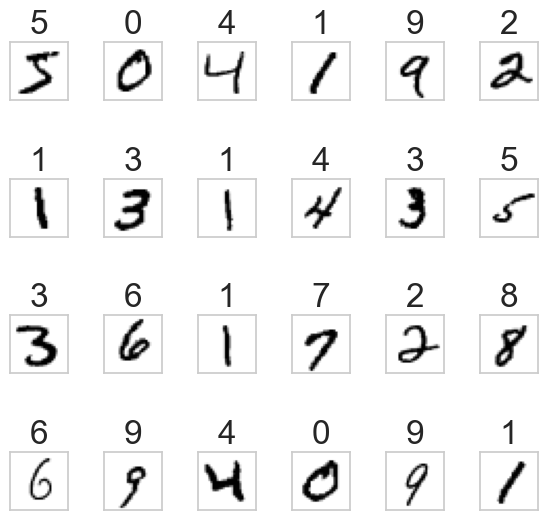

In [29]:
#Exercise 15.21: Multi-Classification of Digits with the MNIST Dataset

# Visualizing the Data #
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 6))

for item in zip(axes.ravel(), digits_data.values, digits_target):
    
    axes, image, target = item
    axes.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r)
    axes.set_xticks([])  
    axes.set_yticks([])  
    axes.set_title(target)
    
plt.tight_layout()     

In [3]:
#Exercise 15.21: Multi-Classification of Digits with the MNIST Dataset

# Splitting the Data for Training and Testing #

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_target.values.codes, 
                                                    random_state=11
                                                    );

# Training the Model #

knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X=X_train, y=y_train)

predicted = knn.predict(X=X_test)

print(f'\nPredicted: {predicted[:20]} \n Expected: {y_test[:20]}')


Predicted: [0 3 8 2 0 2 0 3 6 0 0 0 9 1 8 7 4 6 6 1] 
 Expected: [0 3 8 2 0 2 0 3 6 0 0 0 9 1 8 7 4 6 6 1]


In [31]:
#Exercise 15.21: Multi-Classification of Digits with the MNIST Dataset

#  Model Accuracy #

print(f'Prediction Accuracy Percentage: {(y_test.size - (y_test != predicted).sum()) / y_test.size:.3%}')
print(f'Estimator Method Score: {knn.score(X_test, y_test):.3%}')


confusion_matrix_df = confusion_matrix(y_pred=predicted, y_true=y_test)

confusion_matrix_df = pd.DataFrame(data=confusion_matrix_df,
                                   index=range(10), 
                                   columns=range(10)
                                   );

print('\n \t Confusion Matrix'.expandtabs(22))
display(confusion_matrix_df)

print('\n \t Classification Report'.expandtabs(22))

print(classification_report(y_pred=predicted, 
                            y_true=y_test, 
                            target_names=mnist[1].values.categories))

Prediction Accuracy Percentage: 96.760%
Estimator Method Score: 96.760%

                       Confusion Matrix


0     1     2     3     4     5     6     7     8     9
0  1748     2     1     0     0     3     3     1     0     0
1     0  1887     5     0     1     0     1     2     1     2
2     8    25  1661     3     2     1     2    25     6     2
3     1     4    14  1729     1    15     1    15    11    11
4     3    19     1     1  1595     0     8     1     0    29
5    12     4     0    21     5  1531    17     3     1     9
6     9     2     1     0     2    10  1715     0     0     0
7     0    31     5     0     4     0     0  1779     1    13
8     3    21     3    21     8    38     4     7  1597    16
9     7     5     3     9    13     3     0    21     4  1691


                       Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1758
           1       0.94      0.99      0.97      1899
           2       0.98      0.96      0.97      1735
           3       0.97      0.96      0.96      1802
           4       0.98      0.96      0.97      1657
           5       0.96      0.96      0.96      1603
           6       0.98      0.99      0.98      1739
           7       0.96      0.97      0.97      1833
           8       0.99      0.93      0.96      1718
           9       0.95      0.96      0.96      1756

    accuracy                           0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500



In [32]:
#Exercise 15.21: Multi-Classification of Digits with the MNIST Dataset

# Hyperparameter Tuning #

for k in range(1, 20, 2):
    
     kfold = KFold(n_splits=10, 
                   random_state=11, 
                   shuffle=True);
     
     knn = KNeighborsClassifier(n_neighbors=k)
     
     scores = cross_val_score(estimator=knn,
                              X=digits_data, 
                              y=digits_target.values.codes,
                              cv=kfold);
     
     print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; '
           + f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=97.33%; standard deviation=0.17%
k=3 ; mean accuracy=97.41%; standard deviation=0.22%
k=5 ; mean accuracy=97.26%; standard deviation=0.18%
k=7 ; mean accuracy=97.13%; standard deviation=0.22%
k=9 ; mean accuracy=96.99%; standard deviation=0.22%
k=11; mean accuracy=96.91%; standard deviation=0.26%
k=13; mean accuracy=96.78%; standard deviation=0.28%
k=15; mean accuracy=96.67%; standard deviation=0.28%
k=17; mean accuracy=96.57%; standard deviation=0.26%
k=19; mean accuracy=96.47%; standard deviation=0.23%


In [4]:
#Exercise 15.21: Multi-Classification of Digits with the MNIST Dataset

# Testing Other Models #

estimators = {
     'KNeighborsClassifier': knn, 
     'SVC': SVC(gamma='scale'),
     'GaussianNB': GaussianNB()
     };

for estimator_name, estimator_object in estimators.items():
    
    kfold = KFold(n_splits=10,
                  random_state=11,
                  shuffle=True);
    
    scores = cross_val_score(estimator=estimator_object,
                             X=digits_data,
                             y=digits_target.values.codes,
                             cv=kfold);
    
    print(f'{estimator_name:>20} '
          + f'Mean Accuracy={scores.mean():.3%}; '
          + f'Standard Deviation={scores.std():.3%}')

KNeighborsClassifier Mean Accuracy=96.993%; Standard Deviation=0.217%
                 SVC Mean Accuracy=97.969%; Standard Deviation=0.126%
          GaussianNB Mean Accuracy=55.713%; Standard Deviation=0.626%


15. 22 ***(Project: Multi-Classification of Digits with the EMNIST Dataset)*** The EMNIST
dataset contains over 800,000 digit and character images. You can work with all 800,000
characters or subsets. One subset has 280,000 digits with approximately 28,000 of each
digit (0–9). When the samples are divided evenly among the classes, the dataset is said to
have balanced classes. You can download the dataset from \
&emsp;&emsp;&emsp;&emsp;&emsp; https://www.nist.gov/itl/iad/image-group/emnist-dataset \
in a format used with software called MATLAB, then use SciPy's *loadmat* function (mod-
ule *scipy.io*) to load the data. The downloaded dataset contains several files—one for
the entire dataset and several for various subsets. Load the digits subset, then transform
the loaded data into a format usable for use with scikit-learn. Next, reimplement this
chapter's digits classification case study using the 280,000 EMNIST digits.

In [1]:
#Exercise 15.22: Multi-Classification of Digits with the EMNIST Dataset

from scipy.io import loadmat


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix,  classification_report

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

digits_dataset = loadmat('emnist-digits.mat').get('dataset')

display(digits_dataset)

digits_data = np.vstack((digits_dataset[0,0][0][0,0][0], digits_dataset[0,0][1][0,0][0]))
digits_target = np.vstack((digits_dataset[0,0][0][0,0][1], digits_dataset[0,0][1][0,0][1])).reshape(-1)

print(f'\ndigits_data shape: {digits_data.shape}')
print(f'\ndigits_target shape: {digits_target.shape}')


array([[(array([[(array([[0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       ...,
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[8],
                       [9],
                       [6],
                       ...,
                       [1],
                       [1],
                       [0]], dtype=uint8), array([[3315],
                       [ 302],
                       [2136],
                       ...,
                       [1486],
                       [  43],
                       [3747]], dtype=uint16))                            ]],
              dtype=[('images', 'O'), ('labels', 'O'), ('writers', 'O')]), array([[(array([[0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
               


digits_data shape: (280000, 784)

digits_target shape: (280000,)


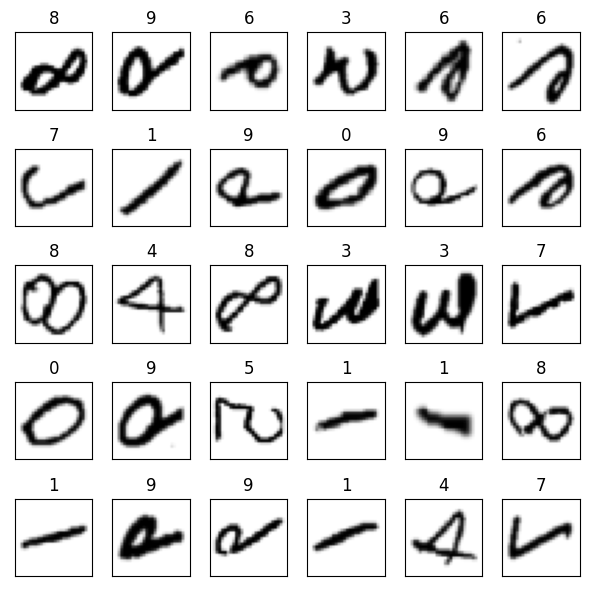

In [2]:
#Exercise 15.22: Multi-Classification of Digits with the EMNIST Dataset

# Visualizing the Data #

figure, axes = plt.subplots(nrows=5, ncols=6, figsize=(6, 6))

for item in zip(axes.ravel(), digits_data, digits_target):
    
    axes, image, target = item
    
    axes.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r)
    axes.set_xticks([])  
    axes.set_yticks([])  
    axes.set_title(target)
    
plt.tight_layout()   

In [3]:
#Exercise 15.22: Multi-Classification of Digits with the EMNIST Dataset

# Splitting the Data for Training and Testing #

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_target, 
                                                    random_state=11
                                                    );

# Training the Model #

knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X=X_train, y=y_train)

predicted = knn.predict(X=X_test)

print(f'\nPredicted: {predicted[:20]} \n Expected: {y_test[:20]}')


Predicted: [3 8 6 9 9 7 6 7 3 3 6 3 2 8 3 0 2 5 5 7] 
 Expected: [3 8 6 9 9 7 6 7 3 3 6 3 2 8 3 0 2 5 5 7]


In [4]:
#Exercise 15.22: Multi-Classification of Digits with the EMNIST Dataset

#  Model Accuracy #

print(f'Prediction Accuracy Percentage: {(y_test.size - (y_test != predicted).sum()) / y_test.size:.3%}')
print(f'Estimator Method Score: {knn.score(X_test, y_test):.3%}')


#  Confusion Matrix #
confusion_matrix_df = confusion_matrix(y_pred=predicted, y_true=y_test)

confusion_matrix_df = pd.DataFrame(data=confusion_matrix_df,
                                   index=range(10), 
                                   columns=range(10)
                                   )
print('\n \t Confusion Matrix'.expandtabs(22))
display(confusion_matrix_df)


# # Classification Report #
print('\n \t Classification Report'.expandtabs(22))

print(classification_report(y_pred=predicted, 
                            y_true=y_test, 
                            target_names=list(map(str,range(10))))) 


Prediction Accuracy Percentage: 97.967%
Estimator Method Score: 97.967%

                       Confusion Matrix


0     1     2     3     4     5     6     7     8     9
0  7030     9     5     1     6     3    12     5     1     2
1     1  6947     6     2     0     0     0     4     4     0
2    34    28  6756    14     1     2     4    79    13     5
3     9     8    23  7008     0    16     1    39    12    14
4    15    63     2     0  6840     0    11     4     0    96
5    17    10     3    41     3  6831    22     6     4    17
6    31    27     1     0     1    12  6987     0     2     0
7     0    56     7     0    15     2     0  6825     2    27
8    17    50    22    77    25    46    28    28  6669    75
9    11    16     2    31    42     7     1    80     5  6684


                       Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7074
           1       0.96      1.00      0.98      6964
           2       0.99      0.97      0.98      6936
           3       0.98      0.98      0.98      7130
           4       0.99      0.97      0.98      7031
           5       0.99      0.98      0.98      6954
           6       0.99      0.99      0.99      7061
           7       0.97      0.98      0.97      6934
           8       0.99      0.95      0.97      7037
           9       0.97      0.97      0.97      6879

    accuracy                           0.98     70000
   macro avg       0.98      0.98      0.98     70000
weighted avg       0.98      0.98      0.98     70000



In [ ]:
#Exercise 15.22: Multi-Classification of Digits with the EMNIST Dataset

# Hyperparameter Tuning #

for k in range(1, 10, 2):
    
     kfold = KFold(n_splits=5, 
                   random_state=11, 
                   shuffle=True);
     
     knn = KNeighborsClassifier(n_neighbors=k)
     
     scores = cross_val_score(estimator=knn,
                              X=digits_data, 
                              y=digits_target,
                              cv=kfold);
     
     print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; '
           + f'standard deviation={scores.std():.2%}')

In [ ]:
#Exercise 15.22: Multi-Classification of Digits with the EMNIST Dataset

# Testing other models

estimators = {
     'KNeighborsClassifier': knn, 
     'SVC': SVC(gamma='scale'),
     'GaussianNB': GaussianNB()
     };

for estimator_name, estimator_object in estimators.items():
    
    kfold = KFold(n_splits=10,
                  random_state=11,
                  shuffle=True);
    
    scores = cross_val_score(estimator=estimator_object,
                             X=digits_data,
                             y=digits_target,
                             cv=kfold);
    
    print(f'{estimator_name:>20} '
          + f'Mean Accuracy={scores.mean():.3%}; '
          + f'Standard Deviation={scores.std():.3%}')
    

15. 23 ***(Project: Multi-Classification of Letters with the EMNIST Dataset)*** In the previous exercise, you downloaded the EMNIST dataset and worked with the digits subset. Another subset contains 145,600 letters with approximately 5600 of each letter (A–Z).
Reimplement the preceding exercise using letter images rather than digits.

In [8]:
#Exercise 15.23: Multi-Classification of Letters with the EMNIST Dataset

from scipy.io import loadmat

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix,  classification_report

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

letters_dataset = loadmat('emnist-letters.mat').get('dataset')

display(letters_dataset)

letters_data = np.vstack((letters_dataset[0,0][0][0,0][0], letters_dataset[0,0][1][0,0][0]))
letters_target = np.vstack((letters_dataset[0,0][0][0,0][1], letters_dataset[0,0][1][0,0][1])).reshape(-1)

print(f'\nletters_data shape: {letters_data.shape}')
print(f'\nletters_target shape: {letters_target.shape}')

array([[(array([[(array([[0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       ...,
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[23],
                       [ 7],
                       [16],
                       ...,
                       [13],
                       [15],
                       [19]], dtype=uint8), array([[1234],
                       [ 799],
                       [3444],
                       ...,
                       [ 785],
                       [ 208],
                       [ 875]], dtype=uint16))                             ]],
              dtype=[('images', 'O'), ('labels', 'O'), ('writers', 'O')]), array([[(array([[0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
                       [0, 0, 0, ..., 0, 0, 0],
        


letters_data shape: (145600, 784)

letters_target shape: (145600,)


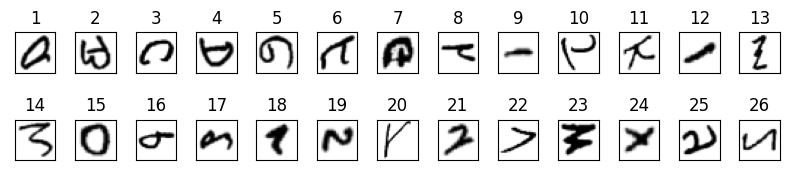

In [9]:
#Exercise 15.23: Multi-Classification of Letters with the EMNIST Dataset


# Visualizing the Data #
images = list()
targets =  list()

for imag, targ in sorted(zip(letters_data, letters_target), 
                         key=lambda x: x[1]):
    
    if targ not in targets:
        images.append(imag)
        targets.append(targ)
        
        if len(targets) == 26:
            break


figure, axes = plt.subplots(nrows=2, ncols=13, figsize=(8, 2))


for item in zip(axes.ravel(), images, targets):
    
    axes, image, target = item
    
    axes.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r)
    axes.set_xticks([])  
    axes.set_yticks([])  
    axes.set_title(target)
    
plt.tight_layout()     

In [10]:
#Exercise 15.23: Multi-Classification of Letters with the EMNIST Dataset

# Splitting the Data for Training and Testing #

X_train, X_test, y_train, y_test = train_test_split(letters_data, 
                                                    letters_target, 
                                                    random_state=11
                                                    );

# Training the Model #

knn = KNeighborsClassifier(n_neighbors=27)

knn.fit(X=X_train, y=y_train)

predicted = knn.predict(X=X_test)

print(f'\nPredicted: {predicted[:20]} \n Expected: {y_test[:20]}')


Predicted: [ 7 16  2 21  6 10  9 18 12  9 10 18 14 24 17 14  1 26  7  8] 
 Expected: [ 7 16  2 21 17 10  9 18 12  9 10 14  1 24 17 14  1 26  7 18]


In [11]:
#Exercise 15.23: Multi-Classification of Letters with the EMNIST Dataset

#  Model Accuracy #

print(f'Prediction Accuracy Percentage: {(y_test.size - (y_test != predicted).sum()) / y_test.size:.3%}')
print(f'Estimator Method Score: {knn.score(X_test, y_test):.3%}')


#  Confusion Matrix #
confusion_matrix_df = confusion_matrix(y_pred=predicted, y_true=y_test)

confusion_matrix_df = pd.DataFrame(data=confusion_matrix_df,
                                   index=range(1,27), 
                                   columns=range(1,27)
                                   )


print('\n \t Confusion Matrix'.expandtabs(22))
display(confusion_matrix_df)


# # Classification Report #
print('\n \t Classification Report'.expandtabs(22))

print(classification_report(y_pred=predicted, 
                            y_true=y_test, 
                            target_names=list(map(str,range(1,27))))) 

Prediction Accuracy Percentage: 83.245%
Estimator Method Score: 83.245%

                       Confusion Matrix


1     2     3     4     5     6    7     8     9     10  ...   17    18  \
1   1035     0    15    13    11     7    9    30     4     4  ...   12     5   
2     10  1146    25     6    34     5    5    52    10     3  ...    1     2   
3      4     0  1329     0    24     1    0     0     3     1  ...    0    16   
4     10    17    10  1044     0     2    0     2    25    44  ...    0     1   
5      2     4   101     0  1204    31    3     0     5     0  ...    0     3   
6      0     0     2     0     1  1055    0     1    37     3  ...    1    36   
7     35    18    69    10    13     6  829     5    11    49  ...  206     3   
8      8     2     2     5     0     2    0  1164    11     1  ...    0    10   
9      0     0     2     0     0     1    1     0  1030    45  ...    0     3   
10     0     0     2    10     0     1    1     3    43  1218  ...    0     2   
11     4     6    13     0     2     7    0    49    15     4  ...    0    29   
12     0     4    15     0     1     1    0     7   318     4  ...    0     1   
13     4     0     0     0     0     0    0    13     1     0  ...    0     4   
14    26     0     1     1     0     0    1    34     0     5  ...    0    14   
15     3     1    23     0     0     0    1     0     3     0  ...    1     0   
16     4     0     0     8     3    48    0     1    18     2  ...    2    11   
17    66     3    25     4    12     8   76     6    18     3  ...  873     6   
18    21     0     6     0    36     5    0     8    12     0  ...    1  1145   
19     2     0     9     0     1     0    0     0     5    29  ...    0     6   
20     0     6    14     1     4    10    0     4    38     2  ...    0    41   
21    11     4     2     2     2     0    2     2     1    10  ...    0     0   
22     0     0     0     0     0     0    0     0     7     8  ...    0    21   
23     2     1     0     1     0     0    0     5     2     1  ...    0     2   
24     2     1     0     0     1     2    1     5    19     5  ...    0     6   
25     1     2     0     4     0     1   12     5    13    38  ...    8    22   
26     3     1     7     0    17     2    4     3     8     6  ...    2     1   

      19    20    21    22    23    24    25    26  
1      1     4    19     0     1     0     0    14  
2     11     5     0     1     2     1     0    10  
3      0     0     3     1     0     0     0     0  
4      2     6    13     6     1     2     0     8  
5      8     1     0     2     0     0     0     1  
6      5    73     1     0     0     0     2     1  
7     61     8    11     0     3     2    12     4  
8      0     7    10     3     2     3     1     0  
9      3    10     1     1     0     0     0    14  
10    23    42     7     7     0     0     0     0  
11     0     7     6    39     1    21    10     1  
12     0     0     1     0     0     0     0     5  
13     0     2     3     1     9     1     2     0  
14     0     1    16     9     7     4     1     3  
15     0     1     5     2     0     0     0     0  
16     0    21     1     1     1     0     1     0  
17     4    24    25     1     5     2    17     1  
18     0     4     0    11     0     4     6     2  
19  1348     1     1     0     0     0     0     0  
20     0  1109     0     2     0     1    13     1  
21     0     0  1231    60     8     0     1     0  
22     0     1    51  1297     1     0    16     0  
23     0     0    23    17  1328     0     0     0  
24     0     5     0    32     0  1222    95     9  
25     1     7    18   109     0     8  1078     0  
26     6    15     0     0     0     7     2  1348  

[26 rows x 26 columns]


                       Classification Report
              precision    recall  f1-score   support

           1       0.83      0.75      0.78      1389
           2       0.94      0.79      0.86      1449
           3       0.79      0.94      0.86      1410
           4       0.94      0.77      0.85      1354
           5       0.88      0.87      0.87      1387
           6       0.88      0.78      0.83      1344
           7       0.88      0.59      0.70      1416
           8       0.83      0.85      0.84      1363
           9       0.62      0.71      0.66      1445
          10       0.82      0.87      0.85      1393
          11       0.93      0.81      0.86      1349
          12       0.53      0.74      0.62      1405
          13       0.96      0.93      0.95      1374
          14       0.82      0.89      0.85      1378
          15       0.72      0.97      0.82      1404
          16       0.83      0.89      0.86      1436
          17       0.79      0.64  

In [ ]:
#Exercise 15.23: Multi-Classification of Letters with the EMNIST Dataset

# Hyperparameter Tuning #

for k in range(1, 28, 2):
    
     kfold = KFold(n_splits=5, 
                   random_state=11, 
                   shuffle=True);
     
     knn = KNeighborsClassifier(n_neighbors=k)
     
     scores = cross_val_score(estimator=knn,
                              X=letters_data, 
                              y=letters_target,
                              cv=kfold);
     
     print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; '
           + f'standard deviation={scores.std():.2%}')


In [ ]:
#Exercise 15.23: Multi-Classification of Letters with the EMNIST Dataset

# Testing other models

estimators = {
     'KNeighborsClassifier': knn, 
     'SVC': SVC(gamma='scale'),
     'GaussianNB': GaussianNB()
     };

for estimator_name, estimator_object in estimators.items():
    
    kfold = KFold(n_splits=10,
                  random_state=11,
                  shuffle=True);
    
    scores = cross_val_score(estimator=estimator_object,
                             X=letters_data,
                             y=letters_target,
                             cv=kfold);
    
    print(f'{estimator_name:>20} '
          + f'Mean Accuracy={scores.mean():.3%}; '
          + f'Standard Deviation={scores.std():.3%}')

15. 24 ***(Try It: Clustering)*** Acxiom is a marketing technology company. Their Personicx
marketing software identifies clusters of people for marketing purposes. Try their "What's
My Cluster?" tool


&emsp;&emsp;&emsp;&emsp;&emsp;  https://isapps.acxiom.com/personicx/personicx.aspx  


to see the marketing cluster to which they feel you belong.
